# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Coursework<a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module ACSE-3: Numerical Methods for year 2019/20.


- This is independent work, you cannot work in groups.


- Each question below is equally weighted in terms of marks.


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use NumPy and SciPy. If you use an algorithm (e.g. from SciPy) not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.


- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - please submit a version where you have run all of the cells and all the outputs/plots etc are visible without me having to run the notebook myself.


<br><br>

# DEADLINE:   5pm Sunday 5 Jan 2020 <a class="tocSkip">

<br><br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coursework-Q1---Implement-RK2-family" data-toc-modified-id="Coursework-Q1---Implement-RK2-family-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coursework Q1 - Implement RK2 family</a></span></li><li><span><a href="#Coursework-Q2---Implementing-backward-Euler-using-a-nonlinear-system-solver" data-toc-modified-id="Coursework-Q2---Implementing-backward-Euler-using-a-nonlinear-system-solver-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Coursework Q2 - Implementing backward Euler using a nonlinear system solver</a></span></li><li><span><a href="#Coursework-Q3---Steady-state-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-Q3---Steady-state-advection-diffusion-with-the-FEM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Coursework Q3 - Steady-state advection-diffusion with the FEM</a></span></li><li><span><a href="#Coursework-Q4---Time-dependent-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-Q4---Time-dependent-advection-diffusion-with-the-FEM-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Coursework Q4 - Time-dependent advection-diffusion with the FEM</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from scipy.integrate import odeint
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as we're in 2D we will be doing some 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# and using some colormaps
from matplotlib import cm
# and we will create some animations!
import matplotlib.animation as animation
from IPython.display import HTML
from pprint import pprint

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Coursework Q1 - Implement RK2 family

Write a function that implements the RK2 family of methods which takes in the free parameter $\alpha$ that appears in the most general definition of RK2.

For example the first line of your function might read

```Python
def RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5):
```

where `f` is a function of time and the solution $y$.

<br>

Perform some verification tests of your function to confirm that with the choice $\alpha=1$ your implementation agrees with results from the improved Euler method which was implemented in lecture 5. 

<br>

Test for convergence using several different values of $\alpha$ using the test problem with RHS and exact solutions given by the test case we saw in lecture 6:

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

which has the exact solution

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6. $$

You may make use of the following functions implementing these:

```python
def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6
```

<br>

Consider a simple error metric given by the error in the solution at time $t=3$.

<br>

Plot your convergence results, compared with results from the forward Euler and the improved Euler methods, and add to the graph your estimates for the order of convergence of each method.

<br>

Also, for a fixed time step size, compute and plot how the error varies as a function of $\alpha$ for values in the range $[0.1,4.0]$.  

<br>

What is the optimal value of $\alpha$ which minimises the error for this problem?

In [2]:
def RK2(f, y0, t0, t_max, dt, alpha = 0.5):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]                 
    while t < t_max:
        k1 = f(t, y)
        k2 = f(t + alpha*dt, y + alpha*dt*k1)
        y = y + (1 - 1/(2*alpha))*dt*k1 + 1/(2*alpha)*dt*k2
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


def improved_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        ue = u + dt*f(t, u)  # euler guess
        u = u + 0.5*dt* ( f(t, u) + f(t + dt, ue) )
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

def forward_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + dt*f(t, u)  # euler guess
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

def f_test1(t, y):
    return y + 1

def f_test2(t, y):
    return np.sin(y)

#test 3 and it is the given function
def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 -3*t**2 - 6*t -6

### Q1.1 
Perform some verification tests of your RK2 function to confirm that with the choice  𝛼=1  my implementation agrees with results from the improved Euler method

Test 1: results of RK2 and Improved Euler are close: True
Test 2: results of RK2 and Improved Euler are close: True
Test 3: results of RK2 and Improved Euler are close: True


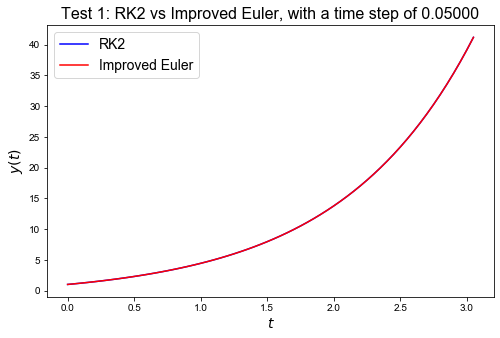

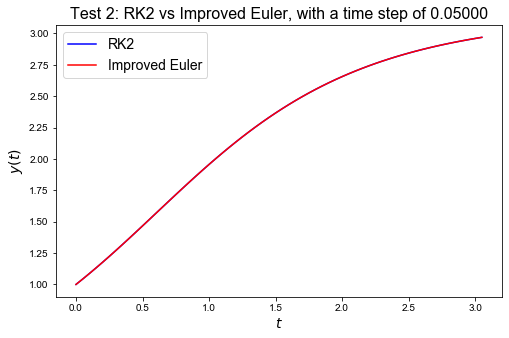

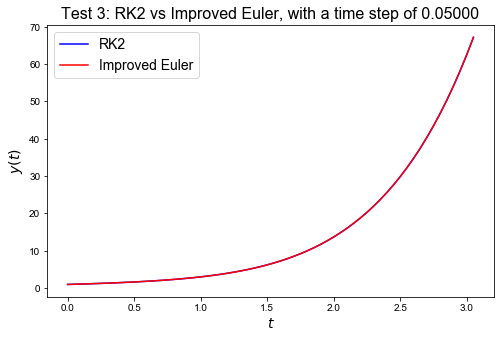

In [3]:
# problem parameters
dt = 0.05
u0 = 1.0
t0 = 0.0
tf = 3

# set up figure
#test 1
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

uall, tall = RK2(f_test1, u0, t0, tf, dt, alpha = 1.0)
ax1.plot(tall, uall, 'b', label='RK2')

uall1, tall1 = improved_euler(f_test1, u0, t0, tf, dt)
ax1.plot(tall1, uall1, 'r', label='Improved Euler')

ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$y(t)$', fontsize=14)
ax1.set_title('Test 1: RK2 vs Improved Euler, with a time step of {0:.5f}'.format(dt), fontsize=16)
ax1.legend(loc='best', fontsize=14)

print('Test 1: results of RK2 and Improved Euler are close:',np.allclose(uall, uall1))

#test 2
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

uall, tall = RK2(f_test2, u0, t0, tf, dt, alpha = 1.0)
ax1.plot(tall, uall, 'b', label='RK2')

uall1, tall1 = improved_euler(f_test2, u0, t0, tf, dt)
ax1.plot(tall1, uall1, 'r', label='Improved Euler')

ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$y(t)$', fontsize=14)
ax1.set_title('Test 2: RK2 vs Improved Euler, with a time step of {0:.5f}'.format(dt), fontsize=16)
ax1.legend(loc='best', fontsize=14)

print('Test 2: results of RK2 and Improved Euler are close:',np.allclose(uall, uall1))

#test 3
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

uall, tall = RK2(f, u0, t0, tf, dt, alpha = 1.0)
ax1.plot(tall, uall, 'b', label='RK2')

uall1, tall1 = improved_euler(f, u0, t0, tf, dt)
ax1.plot(tall1, uall1, 'r', label='Improved Euler')

ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$y(t)$', fontsize=14)
ax1.set_title('Test 3: RK2 vs Improved Euler, with a time step of {0:.5f}'.format(dt), fontsize=16)
ax1.legend(loc='best', fontsize=14)

print('Test 3: results of RK2 and Improved Euler are close:',np.allclose(uall, uall1))


#### Analysis of Q1.1
There are three figures show that results from three different functions implementd RK2 methods with $\alpha$ = 1 are similar to results from the improved Euler method.

### Q1.2
Test for convergence using several different values of $\alpha$ using the test problem with RHS and exact solutions given.

Consider a simple error metric given by the error in the solution at time $t=3$.

Plot your convergence results, compared with results from the forward Euler and the improved Euler methods, and add to the graph your estimates for the order of convergence of each method.

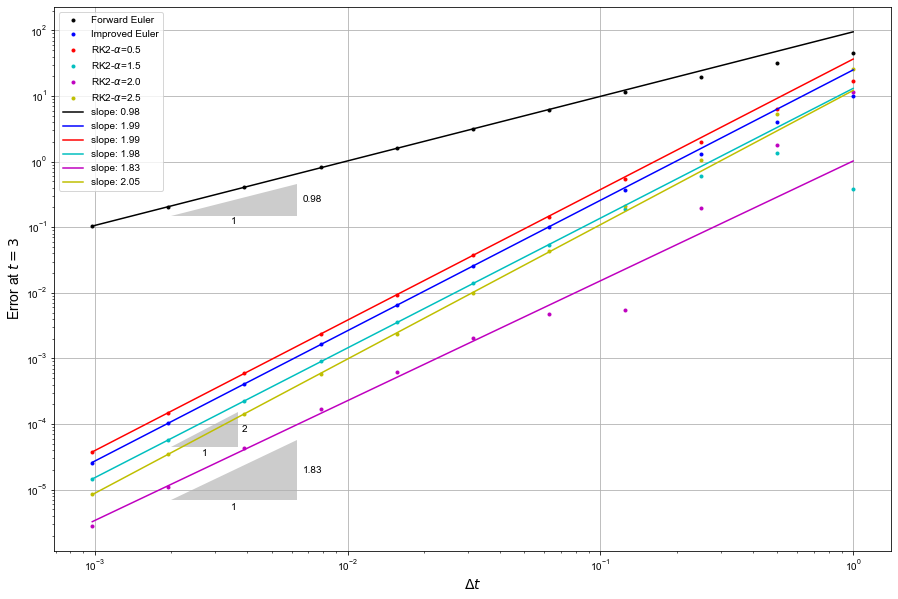

In [4]:
# problem parameters
u0 = 1.0
t0 = 0
tf = 3

def approx_error(dt, tf):
    uall, tall = forward_euler(f, u0, t0, tf, dt)
    err1 = abs(uall[-1]-y_ex(tf))
    uall, tall = improved_euler(f, u0, t0, tf, dt)
    err2 = abs(uall[-1]-y_ex(tf))
    uall, tall = RK2(f, u0, t0, tf, dt, 0.5)
    err3 = abs(uall[-1]-y_ex(tf))
    uall, tall = RK2(f, u0, t0, tf, dt, 1.5)
    err4 = abs(uall[-1]-y_ex(tf))
    uall, tall = RK2(f, u0, t0, tf, dt, 2.0)
    err5 = abs(uall[-1]-y_ex(tf))
    uall, tall = RK2(f, u0, t0, tf, dt, 2.5)
    err6 = abs(uall[-1]-y_ex(tf))
    return err1, err2, err3,err4, err5, err6


error_fe = []
error_ie = []
error_rk2 = []
error_rk2_1 = []
error_rk2_2 = []
error_rk2_3 = []
dt_array = []
dt = 1.
while dt > 5.e-4:
    dt_array.append(dt)
    err1, err2, err3,err4, err5, err6 = approx_error(dt, tf)
    error_fe.append(err1)
    error_ie.append(err2)
    error_rk2.append(err3)
    error_rk2_1.append(err4)
    error_rk2_2.append(err5)
    error_rk2_3.append(err6)
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))
ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
ax1.loglog(dt_array, error_rk2, 'r.', label='RK2-' r'$\alpha$''=0.5')
ax1.loglog(dt_array, error_rk2_1, 'c.', label='RK2-' r'$\alpha$''=1.5')
ax1.loglog(dt_array, error_rk2_2, 'm.', label='RK2-' r'$\alpha$''=2.0')
ax1.loglog(dt_array, error_rk2_3, 'y.', label='RK2-' r'$\alpha$''=2.5')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data

# what does this parameter do, and what happens if you choose equal to a smaller value
start_fit = 4

line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)
line_fit_rk2 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_rk2[start_fit:]), 1)
line_fit_rk2_1 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_rk2_1[start_fit:]), 1)
line_fit_rk2_2 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_rk2_2[start_fit:]), 1)
line_fit_rk2_3 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_rk2_3[start_fit:]), 1)

ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_ie[0]))
ax1.loglog(dt_array, np.exp(line_fit_rk2[1]) * dt_array**(line_fit_rk2[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_rk2[0]))
ax1.loglog(dt_array, np.exp(line_fit_rk2_1[1]) * dt_array**(line_fit_rk2_1[0]), 'c-', label = 'slope: {:.2f}'.format(line_fit_rk2_1[0]))
ax1.loglog(dt_array, np.exp(line_fit_rk2_2[1]) * dt_array**(line_fit_rk2_2[0]), 'm-', label = 'slope: {:.2f}'.format(line_fit_rk2_2[0]))
ax1.loglog(dt_array, np.exp(line_fit_rk2_3[1]) * dt_array**(line_fit_rk2_3[0]), 'y-', label = 'slope: {:.2f}'.format(line_fit_rk2_3[0]))

annotation.slope_marker((2e-3, 1.5e-1), (0.98, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 4.5e-5), (2, 1), ax=ax1, size_frac=0.08, pad_frac=0.05)
annotation.slope_marker((2e-3, 7e-6), (1.83, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

ax1.legend(loc='best')

#### Analysis 1.2

The figure above shows that convergence results of forward Euler is the first order (slop is 0.98 and other are close to 2) and its error is larger than RK2 and improved Euler at same time step size.

In analysis 1.1, we know that improved Euler could be regarded as RK2 with $\alpha=1$. The figure shows that error convergence of each $\alpha$ are second order, but slope at $\alpha=2$ is around 1.83. 

It could be concluded that convergence of forward Euler is first order accurate and  RK2 convergences are close to second order accurate.

### Q1.3
For a fixed time step size, compute and plot how the error varies as a function of  𝛼  for values in the range  [0.1,4.0] .

What is the optimal value of  𝛼  which minimises the error for this problem?

D:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


Optimal alpha = 2.0999999999999996


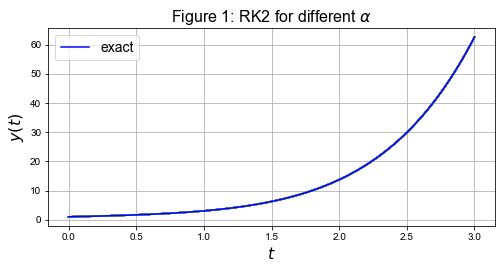

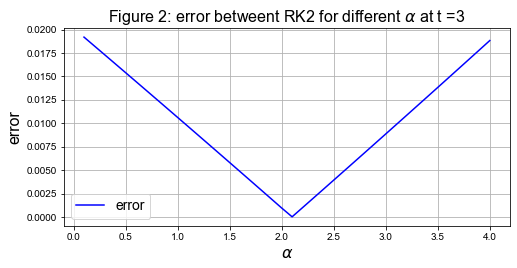

In [5]:
# problem parameters
dt = 0.02
u0 = 1.0
t0 = 0
tf = 3

t = np.linspace(t0, tf, (tf-t0)/dt)
alpha = np.linspace(0.1, 4.0, 40)

t_chosen = 3  # t = 3
n_chosen = int(t_chosen/tf*(tf-t0)/dt) # t =3, n = 60
error = []

# exact slolution
u_ex = y_ex(t)

# full comparison between RK2 method and exact solution
fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(211)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$y(t)$', fontsize=16)
ax1.set_title('Figure 1: RK2 for different ' r'$\alpha$', fontsize=16)

for i, a in enumerate(alpha):
    uall, tall = RK2(f, u0, t0, tf, dt, a)
    error.append(abs(uall[n_chosen]-u_ex[n_chosen-1]))
    ax1.plot(tall, uall)
    
ax1.plot(t, u_ex, 'b', label='exact')
ax1.legend(loc='best', fontsize=14);
ax1.grid(True)


# a simple error between RK2 method and exact solution at t =3
fig = plt.figure(figsize=(8, 8))
ax2 = plt.subplot(212)
ax2.set_xlabel(r'$\alpha$', fontsize=16)
ax2.set_ylabel('error', fontsize=16)
ax2.set_title('Figure 2: error betweent RK2 for different ' r'$\alpha$' ' at t =3', fontsize=16)
ax2.plot(alpha, error, 'b', label='error')
ax2.legend(loc='best', fontsize=14);
ax2.grid(True)

print("Optimal alpha = %s" % alpha[np.argmin(error)])

#### Analysis Q1.3

Figure 1 and 2 show error varies as $\alpha$ for values in the range $[0.1,4.0]$ with a fixed time step size.

In Figure 1, it is difficult to know which $\alpha$ can get best results that are closest to exact result.

From Figure 2, it is clear that error becomes smaller when $\alpha$ increases from 0.1 t0 2.1 and error becomes larger when $\alpha$ increases from 2.1 t0 4.0.

Therefore, the optimal value of $\alpha$ is 2.1 which minimises the error for this problem.

# Coursework Q2 - Implementing backward Euler using a nonlinear system solver

In the lecture 5 homework (question "circular orbits") we considered the vector ODE problem

\begin{align*}
\dot{x} & = -y, \\[5pt] 
\dot{y} & = x
\end{align*} 

with initial conditions $x(0)=1,\; y(0)=0$.  

We saw in that homework question how the forward and improved Euler methods performed on this problem.

Recall that the exact solution's trajectory in $(x,y)$ space should map out a circle, but forward Euler's orbit was found to rapidly increase in diameter.

<br> 

Write a function to implement the backward Euler scheme for a generic RHS vector function $\boldsymbol{f}$. 

To do this you will need to call a nonlinear system solver, make use of one of the ones that we saw in lecture 4.

<br>

Run your code for the above problem and comment on the qualitative differences between your solution obtained with backward Euler with that obtained using forward Euler.

<br>

Based on your observations implement another implicit two-level scheme which should provide qualitatively improved results compared with both forward and backward Euler. 

<br>

Given that the exact solution maps out a circle, consider what mathematical conservation law (a function of the solution variables that should be constant) the solution should respect and check how well each of your methods performs at satisfying this law.

### Q2.1

Write a function to implement the backward Euler scheme for a generic RHS vector function  𝑓 .


#### Answer:

The **backward Euler** or **implicit Euler** method is expressed as:

$$\frac{y_{n+1} - y_{n}}{\Delta t} = {f}(t_{n+1},{y}_{n+1}) \;\;\; \iff \;\;\; y_{n+1} - {\Delta t}\,{f}(t_{n+1},{y}_{n+1}) = y_{n}$$

Note that this results in an *implicit* equation for $y_{n+1}$.

Then, we can define F(.):
$$F(y^{k+1}) = y^{k+1} - y^k -\Delta tf(t^{k+1},y^{k+1})$$ 

Derivative with $y^{k+1}$ to get:

$$J(y^{k+1}) = I - \Delta tJ(t^{k+1},y^{k+1})$$

Where $J(t^{k+1},y^{k+1})$ is called the jacobian matrix.

In Newton method, we will use a guess solution $y^{k+1}$ to get a accurate real solution through many iterations. In this case, we will assume that $y^{k+2}$ is the real solution $y_{n+1}$.

We can use first order Taylor approximation formula to know: 

$$F(y^{k+2}) = F(y^{k+1}) + J(y^{k+1})(y^{k+2} - y^{k+1})$$

With the assumption of $y^{k+2}$ = $y_{n+1}$, $F(y^{k+2})\approx 0$ (or less than absolute tolerance), so we need to solve:
$$ J(y^{k+1})(y^{k+2} - y^{k+1}) = -F(y^{k+1})$$
$$ y^{k+2} - y^{k+1} = J(y^{k+1})^{-1}\,(-F(y^{k+1}))$$
$$ \Delta y^{k+1} = J(y^{k+1})^{-1}\,(-F(y^{k+1}))$$
Therefore
$$ y^{k+2} = y^{k+1} - J(y^{k+1})^{-1}\,F(y^{k+1})$$
$$ y^{k+2} = y^{k+1} - [I - \Delta tJ(t^{k+1},y^{k+1}]\,F(y^{k+1})$$

In [6]:
def f(t, u): 
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f

def forward_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + dt*f(t, u)  # euler guess
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

def backward_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u_guess = np.array(u_all[-1])     # euler guess      
        def F(u_guess):
            return u_guess - u - dt * f(t+dt, u_guess)
        u = newton_system_numdif(F, u_guess, h=1.0e-4, atol=1.0e-6, max_its=100)  
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

def jacobian(f, x, dx):
    """ Compute the Jacobian matrix
    """
    J = np.zeros((len(x), len(x)))
    f0 = f(x)
    for j in range(len(x)):
        # always start from x
        x_inc = x.copy()
        # increment only the j-th entry by dx
        x_inc[j] +=  dx
        # evaluate f at this incremented x
        f1 = f(x_inc)
        # numerical derivative, place the vector result 
        # in the appropriate column of J        
        J[:,j] = (f1 - f0)/dx
    return J

def newton_system_numdif(f, x, h=1.0e-4, atol=1.0e-6, max_its=100):  
    """ Solve the problem f(x)=0 using a numerically computed Jacobian 
    with a step size of h, and use Scipy to solve the linear system
     J \Delta x = -f(x)   at each iteration
    """
    for it in range(max_its-1):
        J = jacobian(f, x, h)
        dx = sl.solve(J, -f(x))
        x += dx
        if sl.norm(dx, np.inf) < atol:
            return x
    print('Hit max_its without converging')

(-1.7, 1.7)

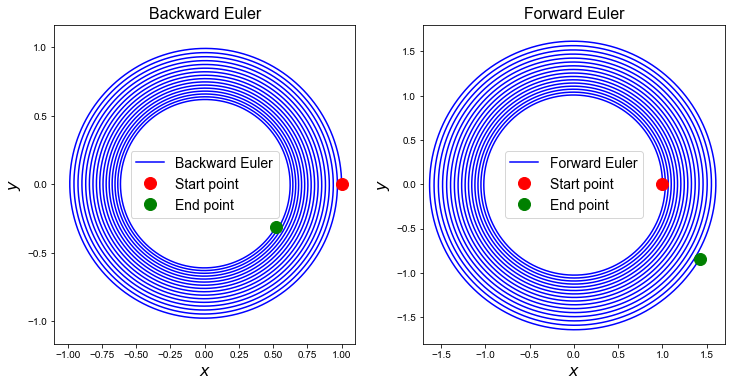

In [7]:
# problem parameters
dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
tf = 100.

# set up figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(w_pad=4)


u0 = np.array([1.,0.])
t0 = 0.0
u, t = backward_euler(f, u0, t0, tf, dt)
ax1.plot(u[:,0], u[:,1], 'b', label='Backward Euler')
ax1.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Backward Euler', fontsize=16)
ax1.axis('equal')
ax1.legend(loc='best', fontsize=14)
ax1.set_xlim(-1.1,1.1)
ax1.set_ylim(-1.1,1.1);


u1, t1 = forward_euler(f, u0, t0, tf, dt)
ax2.plot(u1[:,0], u1[:,1], 'b', label='Forward Euler')
ax2.plot(u1[0,0], u1[0,1], 'ro', label='Start point', markersize=12)
ax2.plot(u1[-1,0], u1[-1,1], 'go', label='End point', markersize=12)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('Forward Euler', fontsize=16)
ax2.axis('equal')
ax2.legend(loc='best', fontsize=14)
ax2.set_xlim(-1.7,1.7)
ax2.set_ylim(-1.7,1.7)


#### Analysis Q2.1

The rigt figure proves agian that Forward Euler's orbit is found to rapidly increase in diameter.

The left figure shows that Backward Euler's orbit is found to rapidly decrease in diameter.

### Q2.2
Run your code for the above problem and comment on the qualitative differences between your solution obtained with backward Euler with that obtained using forward Euler.

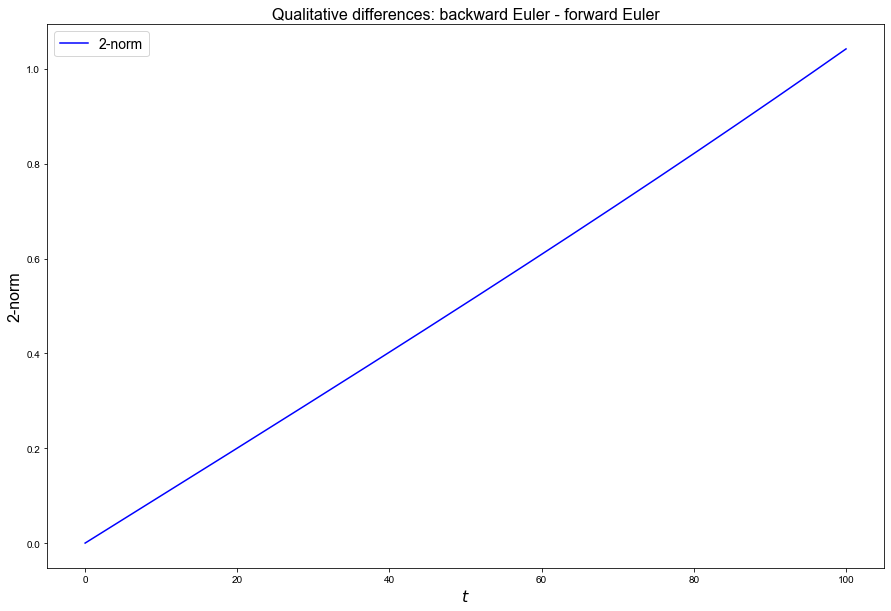

In [8]:
# problem parameters
dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
tf = 100.

fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))

u, t = backward_euler(f, u0, t0, tf, dt)
u1, t1 = forward_euler(f, u0, t0, tf, dt)
ax1.plot(t, np.linalg.norm(u - u1, axis=1), 'b', label='2-norm')

ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('2-norm', fontsize = 16)
ax1.set_title('Qualitative differences: backward Euler - forward Euler', fontsize = 16)
ax1.legend(loc='best', fontsize=14)

#### Analysis Q2.2

Forward Euler's orbit is found to rapidly increase in diameter, and Backward Euler's orbit is found to rapidly decrease in diameter. Therefore, the difference (2-norm) between this two Euler method becomes larger with time.

### Q2.3
Based on your observations implement another implicit two-level scheme which should provide qualitatively improved results compared with both forward and backward Euler.


#### Answer:

The implicit two-level scheme can be expressed as **Trapezoidal**:

\begin{align*}
\frac{y_{n+1} - y_{n}}{\Delta t} & = \frac{1}{2}\left({f}(t_{n},{y}_{n}) + {f}(t_{n+1},{y}_{n+1})\right) \\[5pt] 
\iff \;\;\;  
 y_{n+1} - \frac{\Delta t}{2}{f}(t_{n+1},{y}_{n+1}) & =  y_{n} + \frac{\Delta t}{2}{f}(t_{n},{y}_{n}),
 \end{align*}

Note that this results in an *implicit* equation for $y_{n+1}$.

Then, we can define F(.):
$$F(y^{k+1}) = y^{k+1} -\frac{\Delta t}{2}f(t^{k+1},y^{k+1})- y^{k} -\frac{\Delta t}{2}f(t^{k},y^{k})$$ 

Derivative with $y^{k+1}$ to get:

$$J(y^{k+1}) = I - \Delta tJ(t^{k+1},y^{k+1})$$

Where $J(t^{k+1},y^{k+1})$ is called the jacobian matrix.

In Newton method, we will use a guess solution $y^{k+1}$ to get a accurate real solution through many iterations. In this case, we will assume that $y^{k+2}$ is the real solution $y_{n+1}$.

We can use first order Taylor approximation formula to know: 

$$F(y^{k+2}) = F(y^{k+1}) + J(y^{k+1})(y^{k+2} - y^{k+1})$$

With the assumption of $y^{k+2}$ = $y_{n+1}$, $F(y^{k+2})\approx 0$ (or less than absolute tolerance), so we need to solve:
$$ J(y^{k+1})(y^{k+2} - y^{k+1}) = -F(y^{k+1})$$
$$ y^{k+2} - y^{k+1} = J(y^{k+1})^{-1}\,(-F(y^{k+1}))$$
$$ \Delta y^{k+1} = J(y^{k+1})^{-1}\,(-F(y^{k+1}))$$
Therefore
$$ y^{k+2} = y^{k+1} - J(y^{k+1})^{-1}\,F(y^{k+1})$$
$$ y^{k+2} = y^{k+1} - [I - \Delta tJ(t^{k+1},y^{k+1}]\,F(y^{k+1})$$

In [9]:
def trapezoidal(f, u0, t0, t_max, dt):

    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    
    while t < t_max:
        
        u_guess = np.array(u_all[-1])           
        def F(u_guess):
            return u_guess - u - (1/2) * dt * f(t, u)  - (1/2) * dt * f(t + dt, u_guess)
        u = newton_system_numdif(F, u_guess, h=1.0e-4, atol=1.0e-6, max_its=100) 
        u_all.append(u)
        t = t + dt
        t_all.append(t)
        
    return np.array(u_all), np.array(t_all)


In [10]:
# problem parameters
dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
tf = 100.

u, t = backward_euler(f, u0, t0, tf, dt)
u1, t1 = forward_euler(f, u0, t0, tf, dt)
u2, t2 = trapezoidal(f, u0, t0, tf, dt)

(-1.7, 1.7)

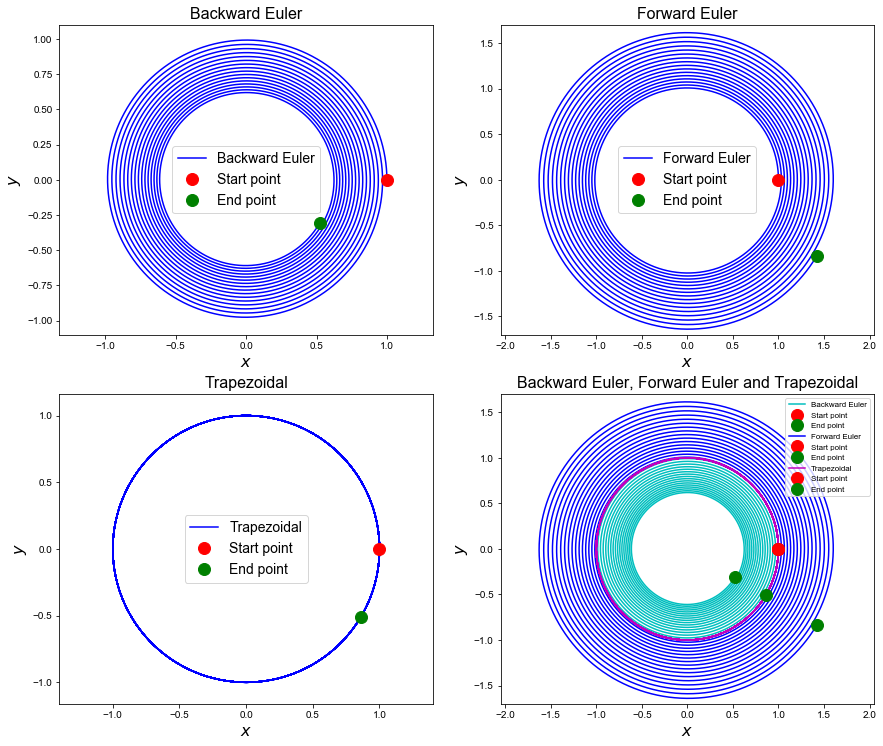

In [11]:
# set up figure
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=4)


u0 = np.array([1.,0.])
t0 = 0.0

axs[0].plot(u[:,0], u[:,1], 'b', label='Backward Euler')
axs[0].plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
axs[0].plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
axs[0].set_xlabel('$x$', fontsize=16)
axs[0].set_ylabel('$y$', fontsize=16)
axs[0].set_title('Backward Euler', fontsize=16)
axs[0].axis('equal')
axs[0].legend(loc='best', fontsize=14)
axs[0].set_xlim(-1.1,1.1)
axs[0].set_ylim(-1.1,1.1);


axs[1].plot(u1[:,0], u1[:,1], 'b', label='Forward Euler')
axs[1].plot(u1[0,0], u1[0,1], 'ro', label='Start point', markersize=12)
axs[1].plot(u1[-1,0], u1[-1,1], 'go', label='End point', markersize=12)
axs[1].set_xlabel('$x$', fontsize=16)
axs[1].set_ylabel('$y$', fontsize=16)
axs[1].set_title('Forward Euler', fontsize=16)
axs[1].axis('equal')
axs[1].legend(loc='best', fontsize=14)
axs[1].set_xlim(-1.7,1.7)
axs[1].set_ylim(-1.7,1.7)


axs[2].plot(u2[:,0], u2[:,1], 'b', label='Trapezoidal')
axs[2].plot(u2[0,0], u2[0,1], 'ro', label='Start point', markersize=12)
axs[2].plot(u2[-1,0], u2[-1,1], 'go', label='End point', markersize=12)
axs[2].set_xlabel('$x$', fontsize=16)
axs[2].set_ylabel('$y$', fontsize=16)
axs[2].set_title('Trapezoidal', fontsize=16)
axs[2].axis('equal')
axs[2].legend(loc='best', fontsize=14)
axs[2].set_xlim(-1.4,1.4)
axs[2].set_ylim(-1.4,1.4)



axs[3].plot(u[:,0], u[:,1], 'c', label='Backward Euler')
axs[3].plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
axs[3].plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)

axs[3].plot(u1[:,0], u1[:,1], 'b', label='Forward Euler')
axs[3].plot(u1[0,0], u1[0,1], 'ro', label='Start point', markersize=12)
axs[3].plot(u1[-1,0], u1[-1,1], 'go', label='End point', markersize=12)

axs[3].plot(u2[:,0], u2[:,1], 'm', label='Trapezoidal')
axs[3].plot(u2[0,0], u2[0,1], 'ro', label='Start point', markersize=12)
axs[3].plot(u2[-1,0], u2[-1,1], 'go', label='End point', markersize=12)
axs[3].set_xlabel('$x$', fontsize=16)
axs[3].set_ylabel('$y$', fontsize=16)
axs[3].set_title('Backward Euler, Forward Euler and Trapezoidal', fontsize=16)
axs[3].axis('equal')
axs[3].legend(loc='best', fontsize=8)
axs[3].set_xlim(-1.7,1.7)
axs[3].set_ylim(-1.7,1.7)

In [12]:
# calculate radius in Trapezoidal result
for i in range (len(u2)):
    print(np.linalg.norm(u2[i]))

1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999998
0.9999999999999999
0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.

#### Analysis Q2.3

Forward Euler's orbit is found to rapidly increase in diameter, and Backward Euler's orbit is found to rapidly decrease in diameter. 

However, Trapezoidal method can get an circule without diameter change (radius keeps 1). Therefore, Trapezoidal method improves results compared with both forward and backward Euler.


### Q2.4

Given that the exact solution maps out a circle, consider what mathematical conservation law (a function of the solution variables that should be constant) the solution should respect and check how well each of your methods performs at satisfying this law.



#### Answer:

We can check this by plotting the "conservation law" 

$$ r(t) := \sqrt{x(t)^2 + y(t)^2} = r(0), $$

in time.

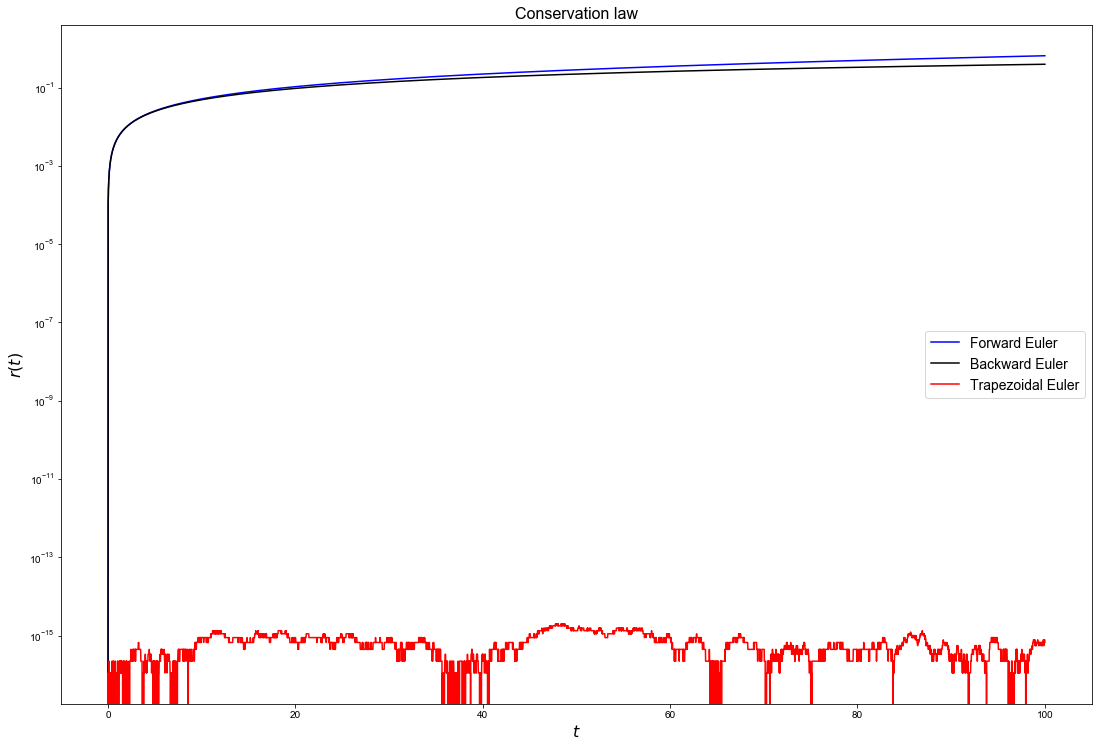

In [13]:
# problem parameters
dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
tf = 100.

# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))
fig.tight_layout(w_pad=4)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$r(t)$', fontsize=16)
ax1.set_title('Conservation law', fontsize=16)


u1, t1 = forward_euler(f, u0, t0, tf, dt)
ax1.semilogy(t1, np.abs(np.sqrt(u1[:,0]**2 + u1[:,1]**2) - np.sqrt(u1[0,0]**2 + u1[0,1]**2)), 'b', label='Forward Euler')

u, t = backward_euler(f, u0, t0, tf, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'k', label='Backward Euler')

u2, t2 = trapezoidal(f, u0, t0, tf, dt)
ax1.semilogy(t2, np.abs(np.sqrt(u2[:,0]**2 + u2[:,1]**2) - np.sqrt(u2[0,0]**2 + u2[0,1]**2)), 'r', label='Trapezoidal Euler')

ax1.legend(loc='best', fontsize=14);

#### Analysis Q2.4

Forward Euler's orbit is found to rapidly increase in radius, and Backward Euler's orbit is found to rapidly decrease in radius, so both Forward and Backward Euler methods have error around $10^{-1}$ and do not satisfy conservation law.

However, Trapezoidal method can get an circule without radius change (radius keeps 1), so this method has error around $10^{-15}$ and satisfies conservation law.

# Coursework Q3 - Steady-state advection-diffusion with the FEM


In this part of the question we want to solve steady-state advection-diffusion using the (non-local-assembly based) finite element approach we developed in lecture 11.



Using the finite element method
formulate and solve the steady-state advection-diffusion (boundary value) problem with Dirichlet boundary conditions we considered in lecture 7 (the exact solution to which is given below).

The difference to what we've seen before in our FEM codes is that you now need to discretise the advection term, which ultimately involves integrating basis functions multiplied by their derivatives over elements.

[**Hint:** *your starting point for this might be the code we wrote in lecture 11 section 5.4 ("Dealing with more complex BCs (Inhomogeneous Dirichlet)"). You need to add in an extra contribution to the LHS corresponding to advection (cf. L11 homework 1.4 where we ended up adding a mass matrix when we solved the problem $u''+u=f$).  You will need to remember to also add in the appropriate extra advection related RHS terms corresponding to the boundary contributions (as was explained in the context of diffusion in section 5.4.2 of lecture 11).*]

<br>

Verify your implementation with a convergence with $\Delta x$ analysis using the exact solution given by
```Python
def u_exact(x):
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)
```
You can use the following parameters (using the notation of lecture 7)
```Python
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1
```
where `CE` is the Dirichlet BC value at the right hand boundary, the left hand boundary being a homogeneous Dirichlet condition.



<br>

Do you observe the expected order of convergence?

<br>

Finally, compare the errors in your solution against a corresponding finite difference solver. You may re-use code from lecture 7 for this. What do you observe?

<br>

Throughout this question you may assume for simplicity a uniform mesh.

### Q3.1
Using the finite element method formulate and solve the steady-state advection-diffusion (boundary value) problem with Dirichlet boundary conditions


#### Answer:
The steady-state advection-diffusion (boundary value) problem can be expressed as:
$$\frac{\partial {u}}{\partial {x}} = \frac{1}{Pe}\frac{\partial^2 {u}}{\partial {x}^2} \;\;\; \iff \;\;\; u''= Pe\,u'$$

where $Pe = \frac{UL}{k}$

CE is the Dirichlet BC value at the right hand boundary, the left hand boundary being a homogeneous Dirichlet condition. Hence,

$$u(0) = u_L = 0;  u(1) = u_R = CE$$


We look for a function $u\in V$ such that for all $v\in V$

$$\int_0^1 \,u''\,v\,dx = \int_0^1 \,Pe\,u'\,v\,dx,$$

that is we satisfy the equation in a "weak sense".

we can also write the solution as 

$$u \approx u_h := \sum_{j=0}^n u_j \phi_j(x) = u_0\phi_0+u_n\phi_n+\sum_{j=1}^{n-1} u_j \phi_j$$


$$\int_0^1 \,u_h''\,\phi_i\,dx = \int_0^1 \,Pe\,u_h'\,\phi_j\,dx,$$

Integrate by parts:

$$\left[u_h'\,\phi_i\right]_0^1 - \int_0^1 u_h'\,\phi_i' \,dx = \left[Pe\,u_h\,\phi_i\right]_0^1 - \int_0^1 Pe\,u_h\,\phi_i' \,dx$$

Due to a "weak sense", it can be written as 
$$ \int_0^1 u_h'\,\phi_i' \,dx = \int_0^1 Pe\,u_h\,\phi_i' \,dx$$

LHS:
$$ \int_0^1 u_h'\,\phi_i' \,dx = \int_0^1 (\sum_{j=0}^n u_j \phi_j')\,\phi_i' \,dx = \sum_{j=0}^n u_j \int_0^1 \phi_j'\,\phi_i'\,dx$$
$$ = u_0 \int_0^1 \phi_0'\,\phi_i'\,dx + u_n \int_0^1 \phi_n'\,\phi_i'\,dx + \sum_{j=1}^{n-1} u_j \int_0^1 \phi_j'\,\phi_i'\,dx$$

RHS:
$$\int_0^1 Pe\,u_h\,\phi_i' \,dx = Pe\, \int_0^1 (\sum_{j=0}^n u_j \phi_j)\,\phi_i' = Pe\,\sum_{j=0}^n u_j \int_0^1 \phi_j\,\phi_i'$$
$$ = Pe\,u_0 \int_0^1 \phi_0\,\phi_i'\,dx + Pe\,u_n \int_0^1 \phi_n\,\phi_i'\,dx + Pe\,\sum_{j=1}^{n-1} u_j \int_0^1 \phi_j\,\phi_i'\,dx$$

Acoording to LHS and RHS, we can get:

$$\sum_{j=1}^{n-1} u_j( \int_0^1 \phi_j'\,\phi_i'\,dx -  Pe\,\int_0^1 \phi_j\,\phi_i'\,dx) = u_0\,(-\int_0^1 \phi_0'\,\phi_i'\,dx + Pe\,\int_0^1 \phi_0\,\phi_i'\,dx)$$
$$ + u_n\,(-\int_0^1 \phi_n'\,\phi_i'\,dx + Pe\,\int_0^1 \phi_n\,\phi_i'\,dx)$$

We now introduce the notation for the "discretisation" matrix
$$ K_{ij} =  \int_0^1 \phi_j'\,\phi_i'\,dx -  Pe\,\int_0^1 \phi_j\,\phi_i'\,dx$$

and the RHS vector
$$ b_i = u_0\,(-\int_0^1 \phi_0'\,\phi_i'\,dx + Pe\,\int_0^1 \phi_0\,\phi_i'\,dx) + u_n\,(-\int_0^1 \phi_n'\,\phi_i'\,dx + Pe\,\int_0^1 \phi_n\,\phi_i'\,dx)$$

Then, the discretised system can now be written as 
$$\sum_{j=1}^{n-1} u_j\, K_{ij} = b_i \;\;\; \iff \;\;\; K\boldsymbol{u} = \boldsymbol{b}$$


Recall that our basis functions are defined as

$$
\phi_i(x) = 
\begin{cases}
\frac{x - x_{i-1}}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{x_{i+1} - x}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

and so their derivatives are simply

$$
\phi'_i(x) = 
\begin{cases}
\frac{1}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{-1}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

In lectures, they have been proven:

$$\int_0^1 \phi_i'\, \phi_i' \,dx = \frac{1}{\Delta x_{i-1}} + \frac{1}{\Delta x_{i}}\;\;\;\;\;  \int_0^1 \phi_i'\, \phi_{i-1}' \,dx = \frac{-1}{\Delta x_{i-1}}\;\;\;\;\;  \int_0^1 \phi_i'\, \phi_{i+1}' \,dx = \frac{-1}{\Delta x_{i}}$$

Then, we need to prove:
\begin{align*}
\int_0^1 \phi_i\, \phi_i' \,dx =
&= 
\int_{x_{i-1}}^{x_i} \phi_i\, \phi_i' \,dx + \int_{x_{i}}^{x_{i+1}} \phi_i\, \phi_i'\,dx
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{x - {x_{i-1}}}{\Delta x_{i-1}^2}dx + \int_{x_i}^{x_{i+1}} \frac{x - {x_{i+1}}}{\Delta x_{i}^2}dx \,\,(s:=x - x_{i-1},\;\;\;
t:=x - x_i)
\\[10pt]
&= \frac{1}{{\Delta x_{i-1}^2}}\,\int_{0}^{\Delta x_{i-1}} sds + \frac{1}{{\Delta x_{i}^2}}\,\int_{-\Delta x_{i}}^{0} tdt 
\\[10pt]
&= \frac{1}{{\Delta x_{i-1}^2}}\,\left[\frac{s^2}{2}\right]_0^{\Delta x_{i-1}} + \frac{1}{{\Delta x_{i}^2}}\,\left[\frac{t^2}{2}\right]_{-\Delta x_{i}}^0
\\[10pt]
&= \frac{1}{2}-\frac{1}{2} = 0
\end{align*}

Similarly, we can also get:

$$\int_0^1 \phi_{i-1}\,\phi_i'\,dx = \frac{1}{2} \;\;  \int_0^1 \phi_{i+1}\,\phi_i' \,dx = -\frac{1}{2}$$

$$\int_0^1 \phi_{0}'\,\phi_1'  \,dx = \frac{-1}{\Delta x_{0}} \;\;  \int_0^1 \phi_{n-1}'\, \phi_{n}' \,dx = \frac{-1}{\Delta x_{n-1}}$$

$$\int_0^1 \phi_{0}\,\phi_1'\,dx = \frac{1}{2} \;\;  \int_0^1 \phi_{n}\,\phi_{n-1}' \,dx = -\frac{1}{2}$$

Then, take the above proven equations into the "discretisation" matrix and RHS vector

The "discretisation" matrix:

$$ K_{i,i} = \frac{1}{\Delta x_{i-1}} + \frac{1}{\Delta x_{i}}$$
$$ K_{i,i+1} = \frac{-1}{\Delta x_{i}}+ \frac{Pe}{2} $$
$$ K_{i,i-1} = \frac{-1}{\Delta x_{i-1}}- \frac{Pe}{2}$$
 

The RHS vector:
$$ b_1 = \frac{u_0}{\Delta x_{0}}+\frac{u_0\,Pe}{2}
= \frac{u_L}{\Delta x_{0}}+\frac{u_L\,Pe}{2}$$
<br>
$$ b_{n-1} = \frac{u_n}{\Delta x_{n-1}}-\frac{u_n\,Pe}{2}
= \frac{u_R}{\Delta x_{n-1}}-\frac{u_R\,Pe}{2}$$

In [14]:
def hat_function(i, x_nodes):
    """ Top hat basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (x_nodes[i+1] - x)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (x - x_nodes[i-1])/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (x-x_nodes[i-1])/dx[i-1], (x_nodes[i+1]-x)/dx[i] ] ,0.0)
    return hat


# don't need the composite version of Simpson's rule here - want the version
# that is able to integrate over a single interval and evaluates the function
# at the two end points as well as the mid point
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

error (RMS) =  0.00311535919164897


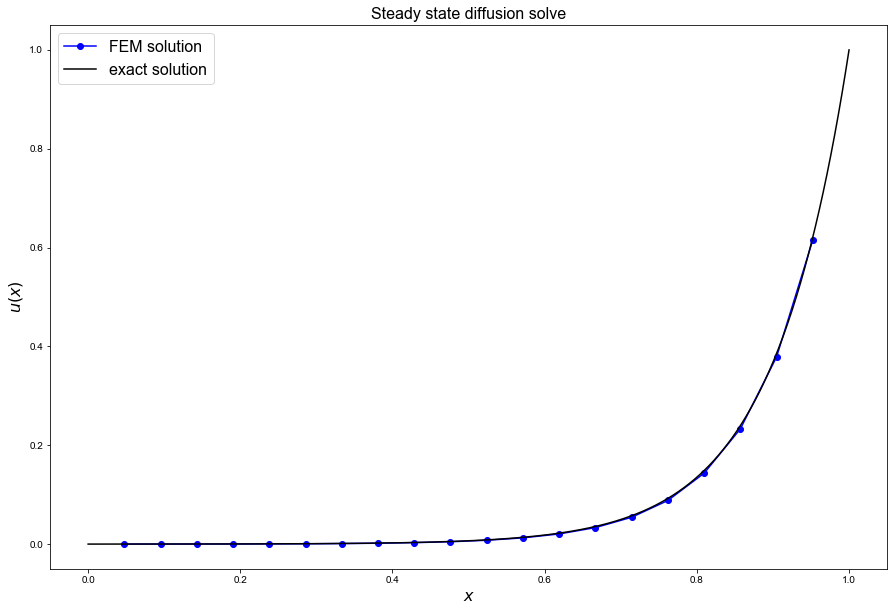

In [15]:
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa/L
CE = 1

uL = 0.
uR = CE

def f(x):
    return 0.0

def u_exact(x):
    global CE, Pe, L
    return CE * (np.exp(Pe *x / L)-1) / (np.exp(Pe) - 1)

def steady_advc_diff_fem(Ns):
    N_elements_CG = Ns
    N_nodes_CG = N_elements_CG + 1

    x_nodes = np.linspace(0, 1 , N_nodes_CG )
    dx = np.diff(x_nodes)
    # space to store our discretisaton matrices
    K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    RHS = np.zeros(N_nodes_CG - 2)

    # construct discretisation matrix for second deriv
    K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
        - np.diag(1. / dx[1:-1] + 1/2 *Pe  , k=-1) \
        - np.diag(1. / dx[1:-1] - 1/2 * Pe , k=1)

    # form RHS vector by integrating function f multiplied by basis function
    # loop over internal nodes
    for node in range(1, N_nodes_CG - 1):
        # and integrate our function multiplied by the corresponding cts basis function  
        phi_i = hat_function(node, x_nodes)
        integrand = lambda x : f(x) * phi_i(x)
        # we need a higher number of intervals to do this accurately with non-uniform mesh
        # but trivial if we split the integrals over each individual element ( as we would
        # with assembly of course)
        RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )


    # Add in the extra entries due to the inhomogeneous Dirichlet BCs
    # b_1
    RHS[0] = (uL * 1/dx[0] ) + (uL * Pe) / 2
    # b_n-1
    RHS[-1] = uR * 1/dx[-1] - (uR * Pe) / 2

    u = sl.solve(K, RHS)
    
    return u, x_nodes

u, x_nodes = steady_advc_diff_fem(21)

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion solve', fontsize=16)
ax1.plot(x_nodes[1:-1], u, 'bo-', label='FEM solution')
x_fine = np.linspace(0, L, 1000)
ax1.plot(x_fine, u_exact(x_fine), 'k-', label='exact solution')
ax1.legend(loc='best', fontsize=16);

print('error (RMS) = ', 
      sl.norm(u - u_exact(x_nodes[1:-1]) )
      /np.sqrt(len(u)) )

#### Analysis Q3.1

The figure above shows that results using finite element method(FEM) are similar to the exact results.

Besides, its RMS error is approximately 0.003115.

### Q3.2

Verify your implementation with a convergence with  Δ𝑥  analysis using the exact solution given

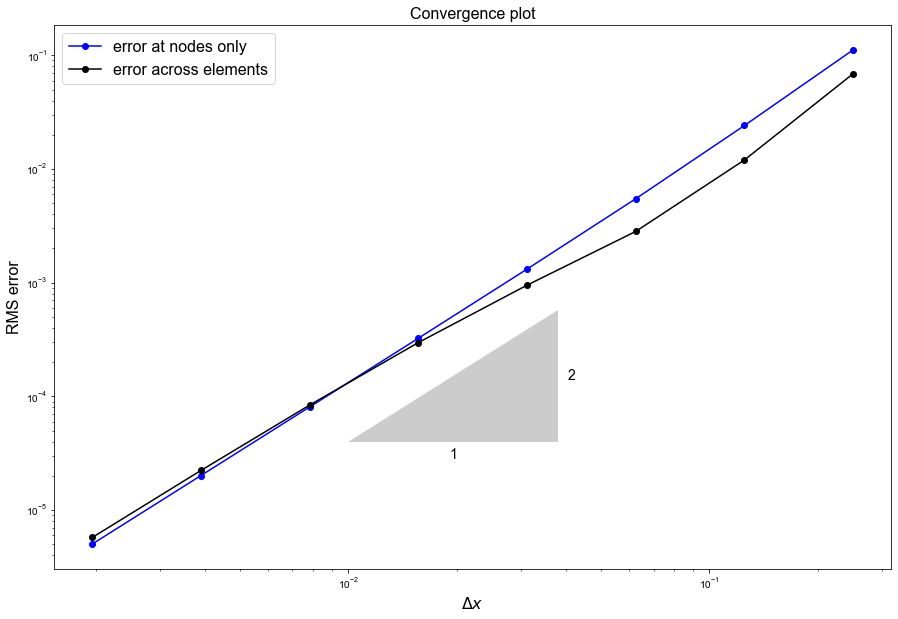

In [16]:
def pwlinear(x_nodes, y_nodes, x):
    """Function to return f_h(x) at locations given in x, 
    with top hat functions on a mesh given by x_nodes, and
    corresponding weights given in y_nodes.
    """
    val = np.zeros_like(x)
    # loop over x values
    for i in range(len(x)):
        # which mesh node is directly to the left of x[i] ?
        node = np.where( x[i] >= x_nodes )[0][-1]
        # because of the greater than or equals above, deal with problem of hitting last node
        node = np.minimum(len(x_nodes)-2,node)
        # add together the contributions from the two hat functions at this x location - 
        # the hat functions centred on "node" (to the left)
        phi_node = hat_function(node, x_nodes)
        # and "node+1" (to the right)
        phi_node_plus_1 = hat_function(node+1, x_nodes)
        # now take the weighted sum of these two hat functions
        val[i] = y_nodes[node]*phi_node(x[i]) + y_nodes[node+1]*phi_node_plus_1(x[i])
    return val

Ns = [2**p for p in range(2, 10)]
errors = np.zeros((2,len(Ns)))

for i, N in enumerate(Ns):
    
    u, x_nodes = steady_advc_diff_fem(N)

    # RMS error of the nodal errors - cf. comments in main lecture text
    errors[0,i] = sl.norm(u - u_exact(x_nodes[1:-1])) / np.sqrt(len(u)) 
    # now let's do the RMS on a fine mesh to approximate the L2 norm
    x_fine = np.linspace(x_nodes[1],x_nodes[-2],1000)
    errors[1,i] = sl.norm(pwlinear(x_nodes[1:-1], u, x_fine) - u_exact(x_fine)) \
                        / np.sqrt(len(x_fine))
    
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.loglog(1./np.array(Ns), errors[0,:], 'bo-', label='error at nodes only')
ax1.loglog(1./np.array(Ns), errors[1,:], 'ko-', label='error across elements')
ax1.legend(loc='best', fontsize=16)
annotation.slope_marker((1e-2, 4e-5), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))


####  Analysis Q3.2

FEM solver is the second order of convergence in terms of the nodal values, and minimum RMS error is around $5\times10^{-6}$ in this conveergence plot.

### Q3.3
Compare the errors in your solution against a corresponding finite difference solver

error (RMS) =  0.0019099055679226331


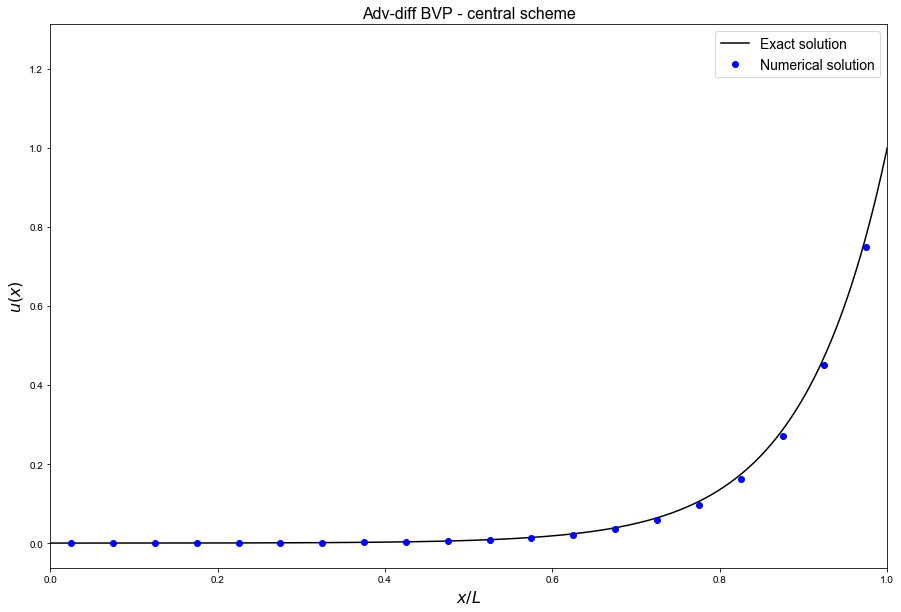

In [17]:
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1

def u_exact(x):
    global CE, Pe, L
    return CE * (np.exp(Pe *x / L)-1) / (np.exp(Pe) - 1) 

def BVP_AD_central(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff.
    
    Returns the mesh x and the solution C
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff
        A[i, i + 1] = r_diff - r_adv
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C


# call function to generate numerical solution
x, C = BVP_AD_central(L, U, kappa, CE, 20)

# construct the exact solution
xf = np.linspace(0, L, 1000)
# Cex = CE * (np.exp(Pe * xf / L) - 1) / (np.exp(Pe) - 1)
Cex = u_exact(xf)

# set up figure
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(111)
ax1.plot(xf, Cex, '-k', label='Exact solution')
ax1.plot(x, C, 'ob', label='Numerical solution')
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Adv-diff BVP - central scheme', fontsize=16)
ax1.legend(loc='best', fontsize=14)

# to exclude ghost points just restrict the x limit of the plot
ax1.set_xlim(0, 1);

print('error (RMS) = ', 
      sl.norm(C[1:-1] - u_exact(x[1:-1]) )
      /np.sqrt(len(u)) )

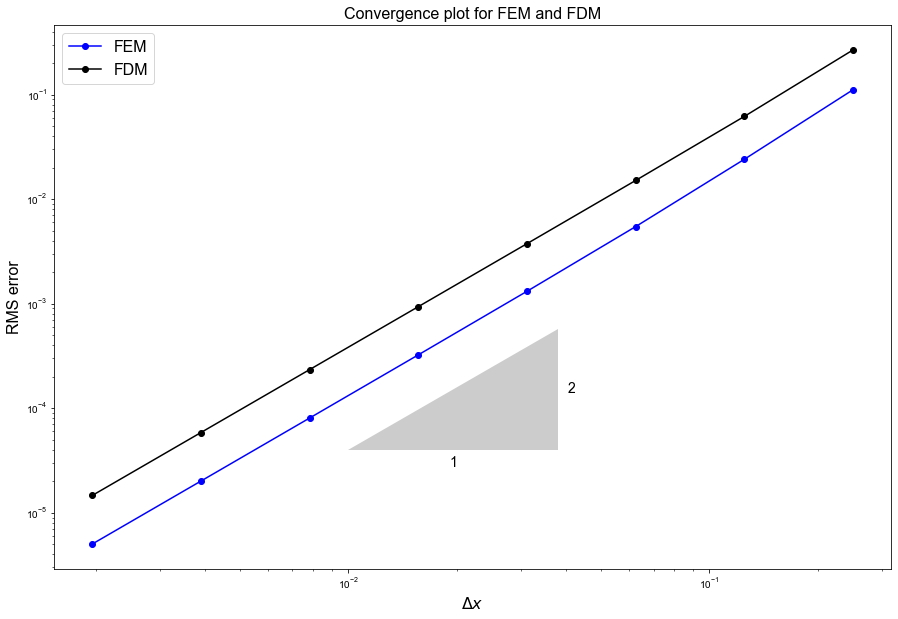

In [18]:
Ns = [2**p for p in range(2, 10)]
errors = np.zeros((2,len(Ns)))

for i, N in enumerate(Ns):
    
    u, x_nodes = steady_advc_diff_fem(N)
    x, C = BVP_AD_central(L, U, kappa, CE, N)

    # RMS error 
    errors[0,i] = sl.norm(u - u_exact(x_nodes[1:-1])) / np.sqrt(len(u)) 
    errors[1,i] = sl.norm(C[1:-1] - u_exact(x[1:-1])) / np.sqrt(len(C[1:-1])) 
    
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Convergence plot for FEM and FDM', fontsize=16)
ax1.loglog(1./np.array(Ns), errors[0,:], 'bo-', label='FEM')
ax1.loglog(1./np.array(Ns), errors[1,:], 'ko-', label='FDM')
ax1.legend(loc='best', fontsize=16)
annotation.slope_marker((1e-2, 4e-5), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))


####  Analysis Q3.3

The first picture shows that results using finite difference method(FDM) are also similar to the exact results.Besides, FDM RMS error is approximately   0.001909 that is larger than FEM RMS error (0.003115).

The second pictur shows both FEM and FDM are the second order  of convergence and RMS errors of FEM is smaller than thoes of FDM with the same $\Delta x$.

# Coursework Q4 - Time-dependent advection-diffusion with the FEM

In this part of the question we want to solve unsteady advection-diffusion.

This time base your solution on the 1D (local) assembly based finite element solver we implemented in lecture 12 and generalise it to include advection.

Test your implementation using the same advection-diffusion of a Gaussian problem considered in
lecture 8 homework question 2 "An analytical solution to advection-diffusion" where I explained and demonstrated how an appropriate Gaussian function can be considered as an exact solution to the advection-diffusion problem as long as we initialise our solution with the Gaussian evaluated at some $t>0$  (since in the limit of  $t=0$   the solution is a Dirac-delta function), and use that same offset in time for the purpose of comparing the analytical solution with the numerical solution you obtain.


```python
def adv_diff_analytical_solution(U, kappa, x0, x, t):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)
```


We can then use the same function evaluated at the appropriate time as an exact solution to compare our numerical method against.
For this question you can consider the (non-periodic) domain $x\in[0,3]$ and you can assume homogeneous Neumann boundary conditions. Initialise the problem using the analytical solution centred initially at $x=0.5$ with an initial time for the purposes of evaluating the Gaussian function of $t=0.05$. Assume a velocity of 1 and a diffusivity of 0.01. Integrate the problem for a total time period of 1 [NB. I've purposefully set these values and the size of the domain so you don't need to worry about your Gaussian getting close to a boundary].

Perform some experiments with different $\Delta x$ and $\Delta t$ values such that you can demonstrate the expected order of convergence in space and in time (for the time-stepping options of forward Euler, backward Euler and Crank-Nicolson). To do this I suggest you fix one of $\Delta x$ or $\Delta t$ and vary the other independently.

### Q4.1

Test your implementation using the same advection-diffusion of a Gaussian problem considered in lecture 8 homework question 2, and use that same offset in time for the purpose of comparing the analytical solution with the numerical solution you obtain.

#### Answer:
Consider time-dependent advection-diffusion written in the form：

$$\frac{\partial u}{\partial t} + U\frac{\partial u}{\partial x} = \kappa\frac{\partial^2 u}{\partial x^2} $$

and assuming for simplicity that the velocity $U$ and and diffusivity $\kappa$ are constant.

$$ \int_I \,\frac{\partial u}{\partial t}\,v\,dx + U\int_I \,u'\,v\,dx = \kappa\int_I \,u''\,v\,dx, \;\;\;\;\forall \;\; v\in V.$$

Substituting in our approximate solution function, and restricting the test functions to the appropriate finite-dimensional space ($v\in V_h$ with a basis given by $\phi_i$) yields the discrete system

$$u \approx u_h(x,t) := \sum_{j=0}^{n} u_j(t)\,\phi_j(x),$$


$$ \int_I \,\frac{\partial u_h}{\partial t}\,\phi_i(x)\,dx + U\int_I \,u_h'\,\phi_i(x)\,dx = \kappa\int_I \,u_h''\,\phi_i(x)\,dx $$

Besides, the weak form of this problem can be written as (ignoring boundary terms) (terms of dvection and diffusion have been proven in Q3.1)

$$ \int_I \,\frac{\partial u}{\partial t}\,\phi_i(x)\,dx -U\int_I \,u_h\,\phi_i(x)'\,dx + \kappa\int_I \,u_h'\,\,\phi_i(x)' dx = 0 $$


\begin{align*} 
\sum_{j=0}^{n} \,\frac{\partial u_j}{\partial t}\, \int_0^1 \phi_j\, \phi_i \,dx  +  \kappa\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx -U\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j\, \phi_i' \,dx &= 0\;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n \\[10pt]
\iff
\sum_{j=0}^{n} \,\frac{d u_j}{d t} M_{ij} + \sum_{j=0}^{n} u_j\, (\kappa\,K_{ij} - U\,S_{ij}) &= 0, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n.
\end{align*}

Or in matrix form

$$
M\, \frac{d \boldsymbol{u}}{d t} + (\kappa\, K - U\,S)\,\boldsymbol{u} = \boldsymbol{0},
$$

where $K$ is the discretisation matrix for diffusion, $S$ is the advection matrix for diffusion and $M$ is the mass matrix. 

We want to implement the "theta" method (to give us the flexibility to choose forward Euler, backward Euler or Crank-Nicolson) in the final question, then we have to consider the system

$$
M \,\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} + (\kappa\, K - U\,S)\,\left(\theta\boldsymbol{u}^{n+1} + (1-\theta)\boldsymbol{u}^{n}\right) = \boldsymbol{0},
$$

which can be rearranged to 

$$ \left( M + \theta\,\Delta t \,(\kappa\, K - U\,S) \right)  \boldsymbol{u}^{n+1} = \left( M - (1-\theta)\, \Delta t \,(\kappa\, K - U\,S) \right) \boldsymbol{u}^{n}.$$






In [19]:
def generate_1D_CG_mesh(Lx, N_elements_CG, mesh_option=0):
    """ Function to generate a mesh given the domain size Lx
    (we assume the left hand entry is always at zero).
    
    Use N_elements_CG number of element.
    
    mesh_option==0 corresponds to a uniform mesh - only option implemented so far.
    
    Returns: the node locations x_node and the mesh spacing dx
    """
    if(mesh_option==0):
        x_nodes = np.linspace(0, Lx ,N_elements_CG+1)
    else:
        raise Exception('mesh_option != 0 not implemented yet')
    # given the mesh compute an array of element sizes
    dx = np.diff(x_nodes)
    return x_nodes, dx

def connectivity(N_loc, N_elements_CG):
    """ Generate the connectivity matrix of dimension N_loc * N_elements_CG.
    
    Row corresponds to the local node number, column to the element number,
    the entry of the matrix is then a global node number.
    
    Returns: the connectivity matrix
    """
    connectivity_matrix = np.zeros((N_loc, N_elements_CG), dtype=int)
    if(N_loc==2):
        for element in range (N_elements_CG):
            connectivity_matrix[0, element] = element
            connectivity_matrix[1, element] = element + 1
    else:
        raise Exception('Only linear element (N_loc=2) implemented.')
    return connectivity_matrix

def shape(N_loc, N_gi):
    """ Define reference shape functions - their values at N_gi quadrature points.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - linear basis functions.
    """ 
    assert(N_loc==2)
    phi = np.zeros( (N_loc, N_gi) )
    if(N_gi==2):
        phi[0,0] = 1.0 
        phi[0,1] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 1.0
    elif(N_gi==3):
        phi[0,0] = 1.0 
        phi[0,1] = 0.5 
        phi[0,2] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 0.5 
        phi[1,2] = 1.0        
    else:
        raise Exception('N_gi value not implemented.')
    return phi

def shape_derivatives(element, dx, N_loc, N_gi):
    """ Define derivatives of shape functions - their values at N_gi quadrature points
    over the reference element.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - 
    linear basis functions.
    """   
    assert(N_loc==2)
    phi_x = np.zeros( (N_loc, N_gi) )
    # the derivatives of our linear basis functions over the reference element
    if(N_gi==2):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] =  phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0]  
        phi_x[1,1] =  phi_x[1,0]
    elif(N_gi==3):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] = phi_x[0,0] 
        phi_x[0,2] = phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0] 
        phi_x[1,1] = phi_x[1,0] 
        phi_x[1,2] = phi_x[1,0]            
    else:
        raise Exception('N_gi value not implemented.')
    # Jacobian contribution as seen/explained above due to the use of the chain rule
    phi_x = phi_x * (2. / dx[element]) 
    return phi_x

def quadrature(N_gi):
    """ Define quadrature rule on N_gi quadrature points.
    """    
    weight = np.zeros(N_gi)
    if(N_gi==2):  # Trapezoidal rule in 1D
        weight[0] = 0.5 
        weight[1] = 0.5
    elif(N_gi==3): # Simpson's rule in 1D
        weight[0] = 1. / 6. 
        weight[1] = 2. / 3. 
        weight[2] = 1. / 6.
    else:
        raise Exception('N_gi value not implemented.')
    return weight

def assembly_local(M, K, S, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx):
    """ Perform local assembly by looping over products of the local node numbers 
    (i.e. products of local basis functions), computing the required integrals, and 
    adding contributions to the correct locations of the global discretisation matrices.
    As we are solving the Diffusion problem we know we need the mass matrix M, and the 
    diffusion discretisation matrix K.  The current version of M and K are passed in here
    and the local contribitions added in to them.
    """
    for i_loc in range(N_loc):
        i_global = connectivity_matrix[i_loc, element]
        for j_loc in range(N_loc):
            j_global = connectivity_matrix[j_loc, element]
            # perform the quadrature - over one element with one "quadrature interval"
            # "weight" is the quadrature weight, e.g. 1/6, 4/6, 1/6 for Simpson's rule
            # and we need to remember to include the Jacobian determinant
            phi_phi = 0.
            phix_phix = 0.
            phi_phix = 0.
            for gi in range(N_gi):
                phi_phi += weight[gi] * phi[i_loc, gi] * phi[j_loc, gi] * 0.5*dx[element] 
                phix_phix += weight[gi] * phi_x[i_loc, gi] * phi_x[j_loc, gi] * 0.5*dx[element]
                phi_phix += weight[gi] * phi[j_loc, gi] * phi_x[i_loc, gi]  * 0.5*dx[element]
            M[i_global, j_global] = M[i_global, j_global] + phi_phi 
            K[i_global, j_global] = K[i_global, j_global] + phix_phix
            S[i_global, j_global] = S[i_global, j_global] + phi_phix  
            
def assembly_global(M, K, S, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx):
    """ Perform global assembly by looping over elements.
    """
    # loop over all elements
    for element in range(N_elements_CG):
        # compute the derivatives of the basis function on this element
        phi_x = shape_derivatives(element, dx, N_loc, N_gi)
        # perform local assembly and update the M and K matrices
        assembly_local(M, K, S, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx)

def apply_bcs(A, b, lbc, rbc, bc_option=0):
    """Apply BCs using a big spring method.
    
    bc_option==0 Homogeneous Neumann
    bc_option==1 inhomogeneous Dirichlet
    """
    if(bc_option==0):
        return
    elif(bc_option==1):
        big_spring = 1.0e10
        A[0,0] = big_spring            
        b[0]   = big_spring * lbc
        A[-1,-1] = big_spring            
        b[-1]   = big_spring * rbc         
    else:
        raise Exception('bc option not implemented')
        
def initial_condition(x, U, kappa, x0, t, IC_option=0):
    """ Function to define an initial condition on our mesh.
    """
    if(IC_option==0):
        return adv_diff_analytical_solution(x, U, kappa, x0, t)
    else:
        raise Exception('Option not implemented.')       

def adv_diff_analytical_solution(x, U, kappa, x0, t):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)

In [20]:
def unsteady_advc_diff_fem(N_nodes_CG, Lx, dt, t_start, t_end, U, kappa, 
                           x0=0.5, theta = 0.):

    # mesh data
    N_elements_CG = N_nodes_CG - 1

    # define some numerical parameters
    N_loc = 2
    N_gi = 3

    # generate mesh
    x_nodes, dx = generate_1D_CG_mesh(Lx, N_elements_CG)
    connectivity_matrix = connectivity(N_loc, N_elements_CG)

    # time stepping
    t = t_start
    
    u_ic = initial_condition(x_nodes, U, kappa, x0, t)

    # and compute and print some key non-dimensional parameters
#     print('Pe_c: {0:.5f}'.format(U*np.min(dx)/kappa))
#     print('CFL:  {0:.5f}'.format(U*dt/np.min(dx)))
#     print('r:    {0:.5f}'.format(kappa*dt/(np.min(dx)**2)))
#     print('dx:   {0:.5f}'.format(np.min(dx)))
#     print('dt:   {0:.5f}\n'.format(dt))

    # set-up things we need for our discretisation
    # the basis functions defined on our reference element
    phi = shape(N_loc, N_gi)

    # quadrature weights
    weight = quadrature(N_gi)

    # allocate space to store our discretisation matrices
    M = np.zeros((N_nodes_CG, N_nodes_CG))
    K = np.zeros((N_nodes_CG, N_nodes_CG))
    S = np.zeros((N_nodes_CG, N_nodes_CG))


    # assemble the individual discretisation matrices
    assembly_global(M, K, S, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx)

    # and combine them into our final matrix system
    A = M + dt*theta*(kappa*K - U*S)
    RHS_matrix = M - dt*(1-theta)*(kappa*K - U*S)

    # and finally time step
    u_old = np.copy(u_ic)
    while t<t_end:
        b = RHS_matrix @ u_old.T 
        apply_bcs(A, b, 0, 0, bc_option=0)
        u = sl.solve(A, b)
        u_old = np.copy(u)
        t += dt

    return u, u_ic, x_nodes

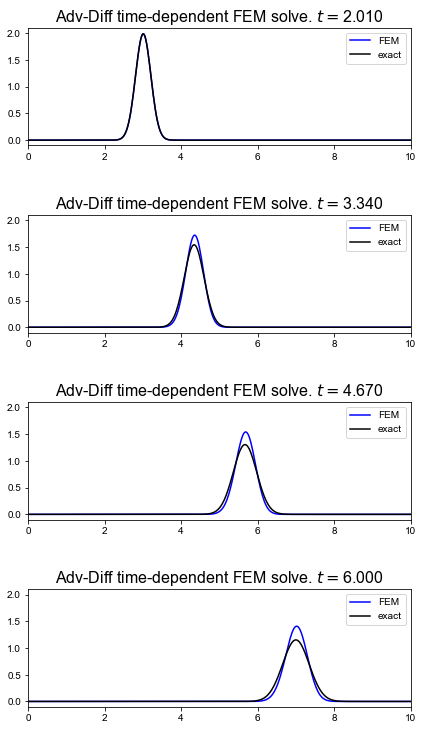

In [21]:
U = 1
kappa = 1./100.
N = 401
L = 10
dx = L / N
dt = 0.01
t_start = 2.00
t_end = np.linspace(2.01, 6, 4)
x0 = 1.0
theta = 0.0


fig, axs = plt.subplots(4, 1, figsize=(6, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)


for i, t_e in enumerate(t_end):
    u, u_ic, x_nodes = unsteady_advc_diff_fem(N, L, dt, t_start, t_e, U, kappa, x0, theta)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_e )
    axs[i].plot(x_nodes, u,'b-', label='FEM')
    axs[i].plot(x_nodes, u_exact,'k-', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.1)
    axs[i].set_title('Adv-Diff time-dependent FEM solve. $t=${0:.3f}'.format(t_e), fontsize=16)
    


### Analysis Q4.1

These four figures shows FEM results in four different times compared with exact results. We could know that FEM results are similar to exact results but the errors between FEM and exact results becomes larger with time increasing.

### Q4.2

We can then use the same function evaluated at the appropriate time as an exact solution to compare our numerical method against. For this question you can consider the (non-periodic) domain  𝑥∈[0,3]  and you can assume homogeneous Neumann boundary conditions. Initialise the problem using the analytical solution centred initially at  𝑥=0.5  with an initial time for the purposes of evaluating the Gaussian function of  𝑡=0.05 . Assume a velocity of 1 and a diffusivity of 0.01. Integrate the problem for a total time period of 1 

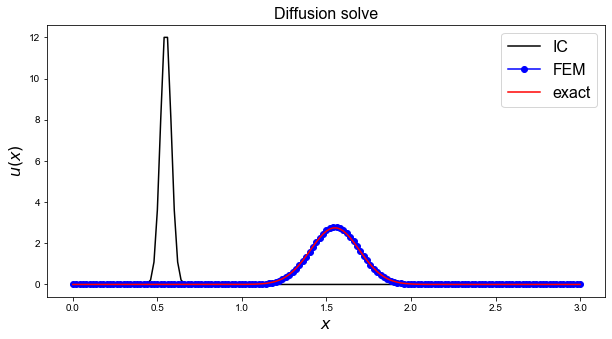

In [22]:
# domain size
Lx = 3.
kappa = 0.01
U = 1.

N = 151
dt = 0.001
t_start = 0.05
t_end = 1.05
x0=0.5
theta = 0

u, u_ic, x_nodes = unsteady_advc_diff_fem(N, Lx, dt, t_start, t_end, U, kappa, x0, theta)
u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_end )
    
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Diffusion solve', fontsize=16)

ax1.plot(x_nodes, u_ic, 'k-', label='IC')
ax1.plot(x_nodes, u, 'bo-', label='FEM')
ax1.plot(x_nodes, u_exact,'r-', label='exact')
ax1.legend(loc='best', fontsize=16);

#### Analysis Q4.2

The black line is the initial condition of FEM, the red line is the excat results at $t=1.05$ and blue line is the FEM results at $t=1.05$. The FEM and exact results look similar, so the FEM solution is acceptable and accurate.

### Q4.3 
Perform some experiments with different  Δ𝑥  and  Δ𝑡  values such that you can demonstrate the expected order of convergence in space and in time (for the time-stepping options of forward Euler, backward Euler and Crank-Nicolson). To do this I suggest you fix one of  Δ𝑥  or  Δ𝑡  and vary the other independently.

**Answer**:

Previously, we have proven:

$$
M \,\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} + (\kappa\, K - U\,S)\,\left(\theta\boldsymbol{u}^{n+1} + (1-\theta)\boldsymbol{u}^{n}\right) = \boldsymbol{0},
$$

**Forward Euler:** set $\theta$ to 0
$$
M \,\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} + (\kappa\, K-US) u^n = 0\\
\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} = A\,u^n
$$

$$where\,\,\, A=-M^{-1}(\kappa\, K-US)$$

**Backward Euler:** set $\theta$ to 1 
$$
M \,\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} + (\kappa\, K-US) u^{n+1} = 0\\
\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} = A\,u^{n+1}
$$

$$where\,\,\, A=-M^{-1}(\kappa\, K-US)$$

**Crank-Nicolsan:** set $\theta$ to 0.5
$$
M \,\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} + \frac{1}{2}(\kappa\, K - U\,S)\,\left(\boldsymbol{u}^{n+1} + \boldsymbol{u}^{n}\right) = 0\\
\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} = \frac{1}{2}A\left(\boldsymbol{u}^{n+1} + \boldsymbol{u}^{n}\right)
$$

$$where\,\,\, A=-M^{-1}(\kappa\, K-US)$$


#### Forward Euler
set $\theta$ to 0

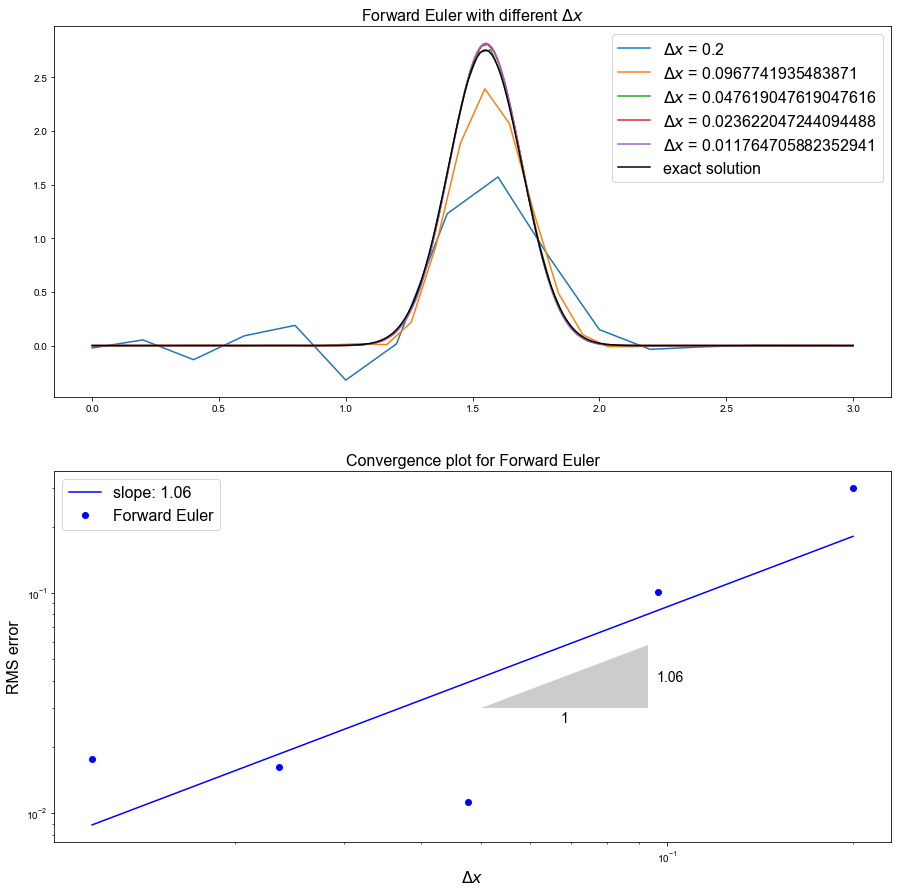

In [23]:
Lx = 3.
kappa = 0.01
U = 1.
t_start = 0.05
t_end = 1.05
x0=0.5

dt = 0.001

theta = 0  # Forward Euler

N = np.array([2**p for p in range(4, 9)])
dx = Lx/(N-1)

errors = np.zeros((len(N)))

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(211)

for i, N_i in enumerate(N):
    
    u, u_ic, x_nodes = unsteady_advc_diff_fem(N_i, Lx, dt, t_start, t_end, U, kappa, x0, theta)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_end)

    ax1.plot(x_nodes ,u, label='$\Delta x$ = ' + str(dx[i]))
    ax1.set_title('Forward Euler with different ' r'$\Delta x$', fontsize=16)
    
    errors[i] = sl.norm(u - u_exact) / np.sqrt(len(u))

u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_end)
ax1.plot(x_nodes, u_exact,'k', label='exact solution')
ax1.legend(fontsize=16)


ax2 = fig.add_subplot(212)

line_fit_fe = np.polyfit(np.log(dx), np.log(errors), 1)
ax2.loglog(dx, np.exp(line_fit_fe[1]) * dx**(line_fit_fe[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax2.set_xlabel('$\Delta x$', fontsize=16)
ax2.set_ylabel('RMS error', fontsize=16)
ax2.set_title('Convergence plot for Forward Euler', fontsize=16)
ax2.loglog(dx, errors, 'bo', label='Forward Euler')
ax2.legend(fontsize=16)
annotation.slope_marker((5e-2, 3e-2), (1.06, 1), ax=ax2,
                        size_frac=0.2, pad_frac=0.05, text_kwargs = dict(fontsize = 14))


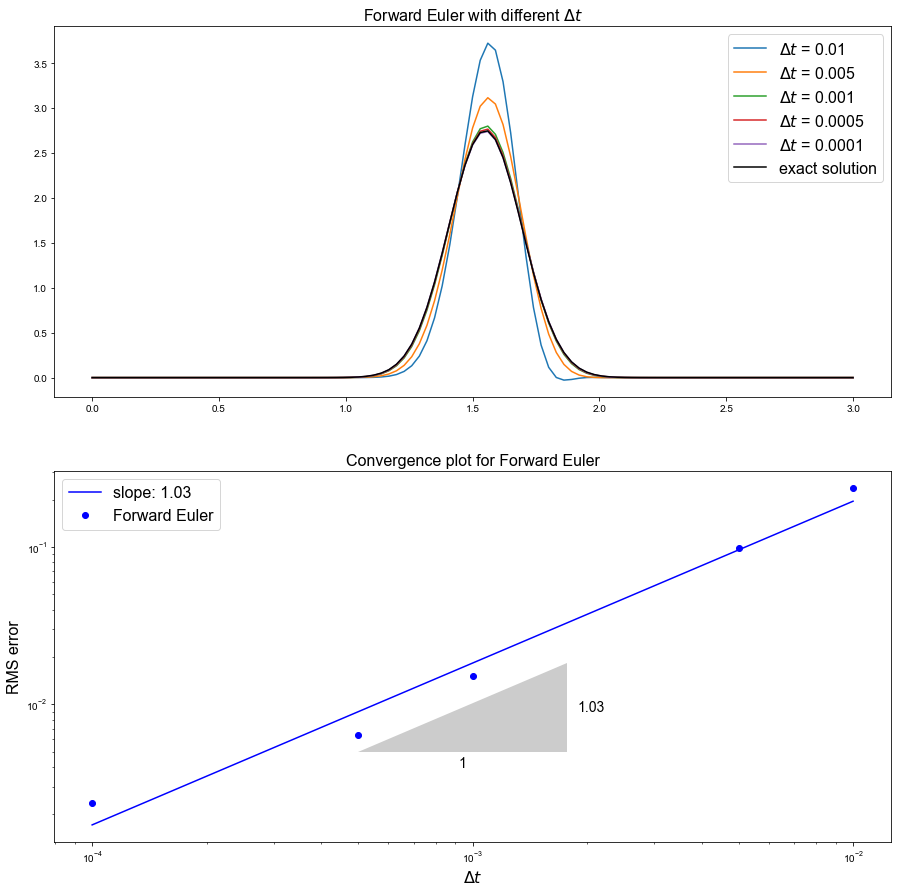

In [24]:
Lx = 3.
kappa = 0.01
U = 1.
t_start = 0.05
t_end = 1.05
x0=0.5

N = 101

theta = 0 # Forward Euler

dt = np.array([ 0.01, 0.005, 0.001, 0.0005, 0.0001])


errors = np.zeros((len(dt)))

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(211)

for i, dt_i in enumerate(dt):
    
    u, u_ic, x_nodes = unsteady_advc_diff_fem(N, Lx, dt_i, t_start, t_end, U, kappa, x0, theta)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_end)

    ax1.plot(x_nodes ,u, label='$\Delta t$ = ' + str(dt[i]))
    ax1.set_title('Forward Euler with different ' r'$\Delta t$', fontsize=16)
    
    errors[i] = sl.norm(u - u_exact) / np.sqrt(len(u))

u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_end)
ax1.plot(x_nodes, u_exact,'k', label='exact solution')
ax1.legend(fontsize=16)


ax2 = fig.add_subplot(212)

line_fit_fe = np.polyfit(np.log(dt), np.log(errors), 1)
ax2.loglog(dt, np.exp(line_fit_fe[1]) * dt**(line_fit_fe[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax2.set_xlabel('$\Delta t$', fontsize=16)
ax2.set_ylabel('RMS error', fontsize=16)
ax2.set_title('Convergence plot for Forward Euler', fontsize=16)
ax2.loglog(dt, errors, 'bo', label='Forward Euler')
ax2.legend(loc='best', fontsize=16)
annotation.slope_marker((5e-4, 5e-3), (1.03, 1), ax=ax2,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))



#### Backward Euler

set $\theta$ to 1

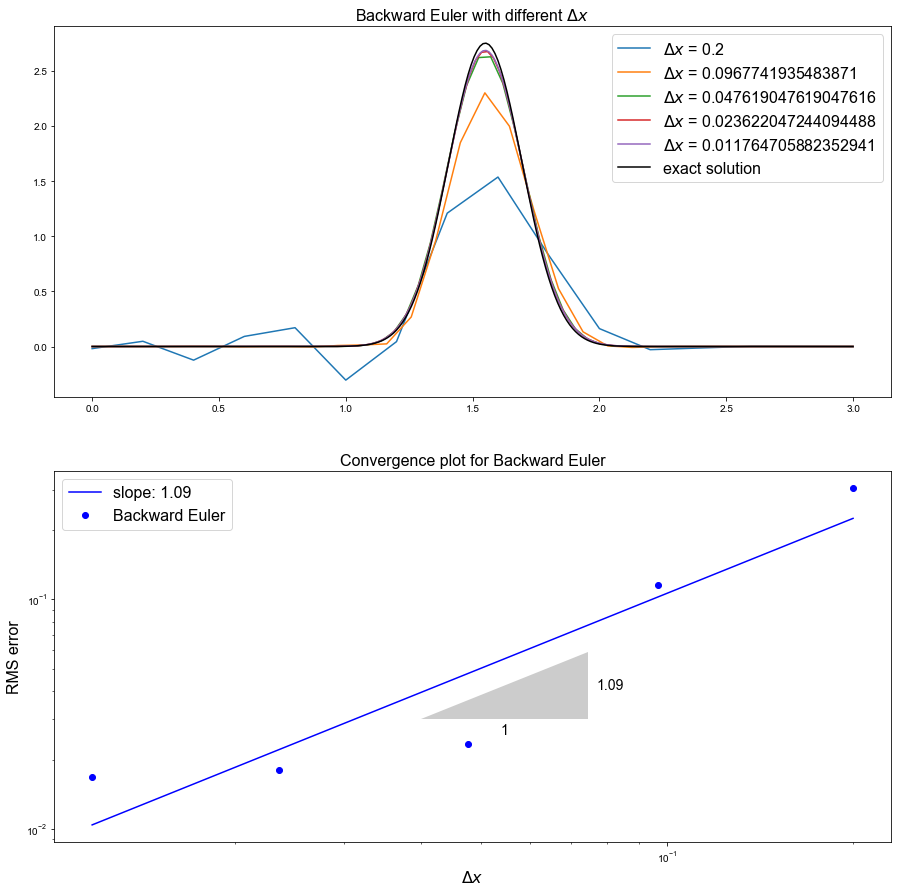

In [25]:
Lx = 3.
kappa = 0.01
U = 1.
t_start = 0.05
t_end = 1.05
x0=0.5

dt = 0.001

theta = 1.  # Backward Euler

N = np.array([2**p for p in range(4, 9)])
dx = Lx/(N-1)

errors = np.zeros((len(N)))

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(211)


for i, N_i in enumerate(N):
    
    u, u_ic, x_nodes = unsteady_advc_diff_fem(N_i, Lx, dt, t_start, t_end, U, kappa, x0, theta)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_end)

    ax1.plot(x_nodes ,u, label='$\Delta x$ = ' + str(dx[i]))
    ax1.set_title('Backward Euler with different ' r'$\Delta x$', fontsize=16)
    
    errors[i] = sl.norm(u - u_exact) / np.sqrt(len(u))

u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_end)
ax1.plot(x_nodes, u_exact,'k', label='exact solution')
ax1.legend(fontsize=16)

ax2 = fig.add_subplot(212)

line_fit_fe = np.polyfit(np.log(dx), np.log(errors), 1)
ax2.loglog(dx, np.exp(line_fit_fe[1]) * dx**(line_fit_fe[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax2.set_xlabel('$\Delta x$', fontsize=16)
ax2.set_ylabel('RMS error', fontsize=16)
ax2.set_title('Convergence plot for Backward Euler', fontsize=16)
ax2.loglog(dx, errors, 'bo', label='Backward Euler')
ax2.legend(fontsize=16)
annotation.slope_marker((4e-2, 3e-2), (1.09, 1), ax=ax2,
                        size_frac=0.2, pad_frac=0.05, text_kwargs = dict(fontsize = 14))


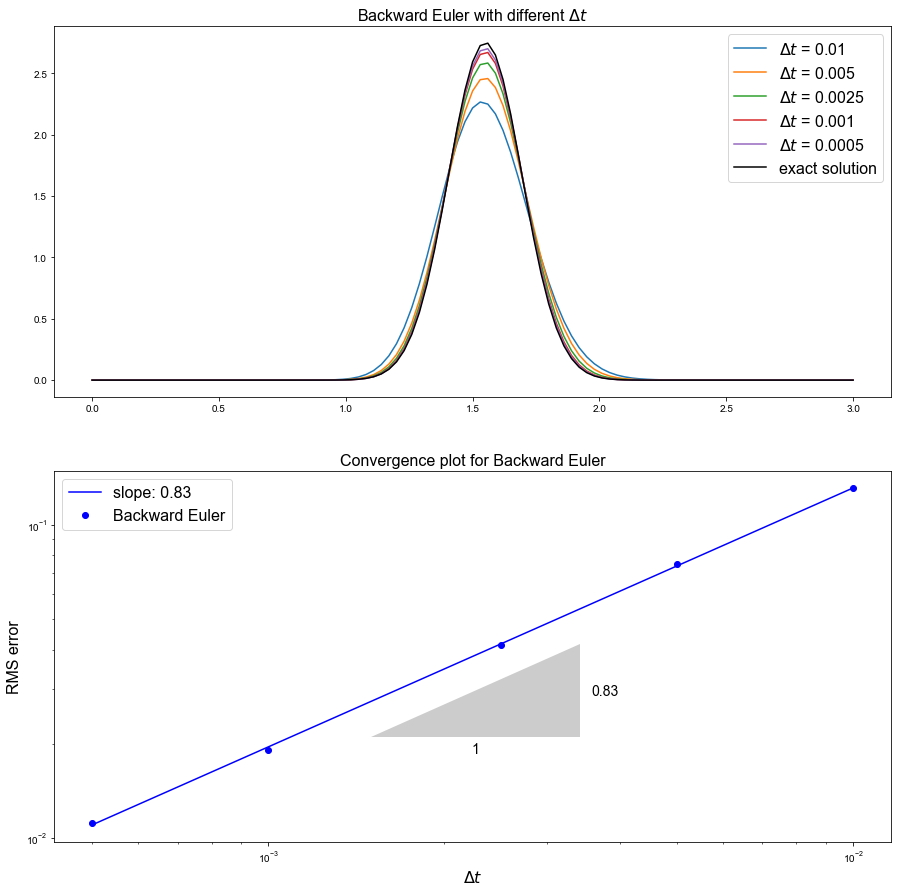

In [26]:
## Lx = 3.
kappa = 0.01
U = 1.
t_start = 0.05
t_end = 1.05
x0=0.5

N = 101

theta = 1.  # Backward Euler

dt = np.array([0.01, 0.005, 0.0025, 0.001, 0.0005])  #0.83


errors = np.zeros((len(dt)))

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(211)

for i, dt_i in enumerate(dt):
    
    u, u_ic, x_nodes = unsteady_advc_diff_fem(N, Lx, dt_i, t_start, t_end, U, kappa, x0, theta)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_end)

    ax1.plot(x_nodes ,u, label='$\Delta t$ = ' + str(dt[i]))
    ax1.set_title('Backward Euler with different ' r'$\Delta t$', fontsize=16)
    
    errors[i] = sl.norm(u - u_exact) / np.sqrt(len(u))

u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_end)
ax1.plot(x_nodes, u_exact,'k', label='exact solution')
ax1.legend(fontsize=16)


ax2 = fig.add_subplot(212)

line_fit_fe = np.polyfit(np.log(dt), np.log(errors), 1)
ax2.loglog(dt, np.exp(line_fit_fe[1]) * dt**(line_fit_fe[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax2.set_xlabel('$\Delta t$', fontsize=16)
ax2.set_ylabel('RMS error', fontsize=16)
ax2.set_title('Convergence plot for Backward Euler', fontsize=16)
ax2.loglog(dt, errors, 'bo', label='Backward Euler')
ax2.legend(loc='best', fontsize=16)
annotation.slope_marker((1.5e-3, 2.1e-2), (0.83, 1), ax=ax2,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

#### Crank-Nicolson

set $\theta$ to 0.5

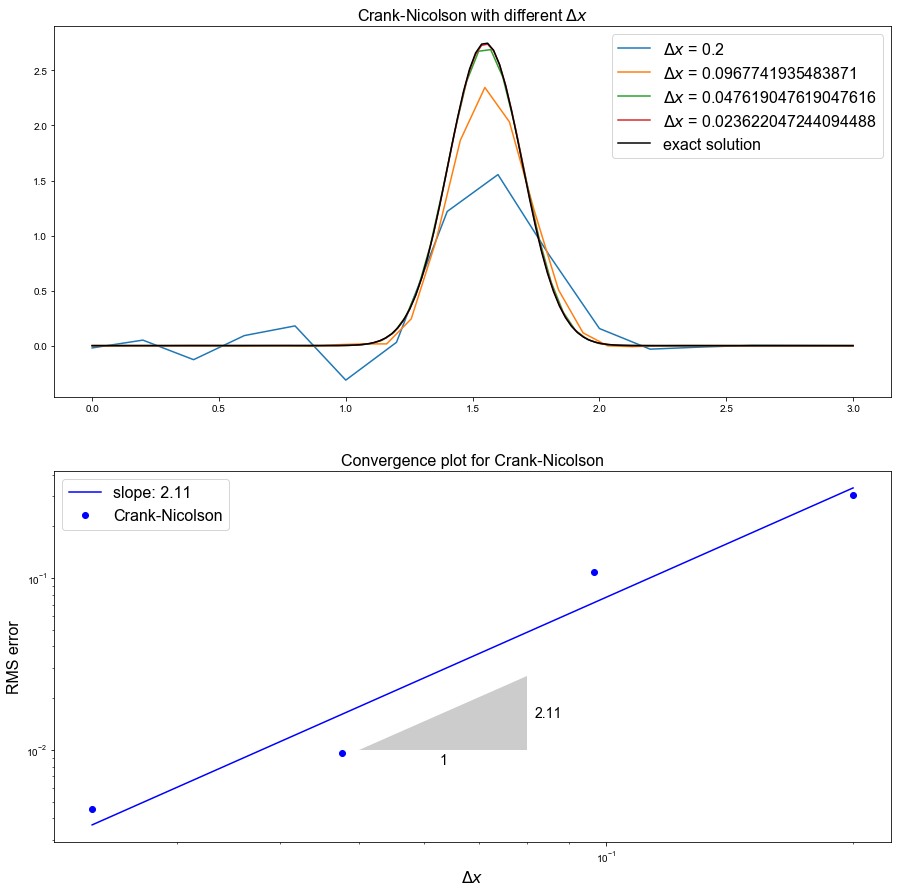

In [27]:
Lx = 3.
kappa = 0.01
U = 1.
t_start = 0.05
t_end = 1.05
x0=0.5

dt = 0.001

theta = 0.5  # Crank-Nicolson


N = np.array([2**p for p in range(4, 8)])
dx = Lx/(N-1)

errors = np.zeros((len(N)))

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(211)


for i, N_i in enumerate(N):
    
    u, u_ic, x_nodes = unsteady_advc_diff_fem(N_i, Lx, dt, t_start, t_end, U, kappa, x0, theta)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_end)

    ax1.plot(x_nodes ,u, label='$\Delta x$ = ' + str(dx[i]))
    ax1.set_title('Crank-Nicolson with different ' r'$\Delta x$', fontsize=16)
    
    errors[i] = sl.norm(u - u_exact) / np.sqrt(len(u))

u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_end)
ax1.plot(x_nodes, u_exact,'k', label='exact solution')
ax1.legend(fontsize=16)

ax2 = fig.add_subplot(212)
line_fit_fe = np.polyfit(np.log(dx), np.log(errors), 1)
ax2.loglog(dx, np.exp(line_fit_fe[1]) * dx**(line_fit_fe[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax2.set_xlabel('$\Delta x$', fontsize=16)
ax2.set_ylabel('RMS error', fontsize=16)
ax2.set_title('Convergence plot for Crank-Nicolson', fontsize=16)
ax2.loglog(dx, errors, 'bo', label='Crank-Nicolson')
ax2.legend(fontsize=16)
annotation.slope_marker((5e-2, 1e-2), (2.11, 1), ax=ax2,
                        size_frac=0.2, pad_frac=0.05, text_kwargs = dict(fontsize = 14))


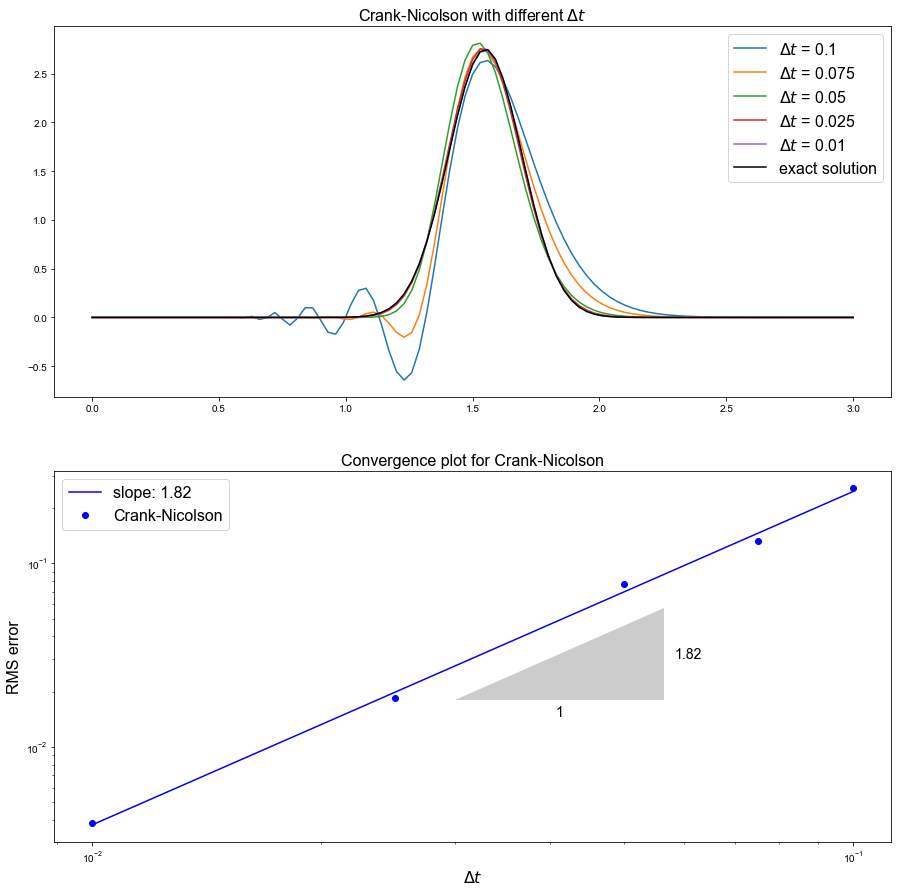

In [28]:
Lx = 3.
kappa = 0.01
U = 1.
t_start = 0.05
t_end = 1.05
x0=0.5

N = 101

theta = 0.5  # Crank-Nicolson
# dt = 1. / 10 ** np.arange(1,5)
# dt = np.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001])
dt = np.array([0.1, 0.05, 0.01]) #1.83
dt = np.array([0.1, 0.075, 0.05, 0.025, 0.01]) #1.82

errors = np.zeros((len(dt)))

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(211)

for i, dt_i in enumerate(dt):
    
    u, u_ic, x_nodes = unsteady_advc_diff_fem(N, Lx, dt_i, t_start, t_end, U, kappa, x0, theta)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_end)

    ax1.plot(x_nodes ,u, label='$\Delta t$ = ' + str(dt[i]))
    ax1.set_title('Crank-Nicolson with different ' r'$\Delta t$', fontsize=16)
    
    errors[i] = sl.norm(u - u_exact) / np.sqrt(len(u))

u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_end)
ax1.plot(x_nodes, u_exact,'k', label='exact solution')
ax1.legend(fontsize=16)

ax2 = fig.add_subplot(212)

line_fit_fe = np.polyfit(np.log(dt), np.log(errors), 1)
ax2.loglog(dt, np.exp(line_fit_fe[1]) * dt**(line_fit_fe[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax2.set_xlabel('$\Delta t$', fontsize=16)
ax2.set_ylabel('RMS error', fontsize=16)
ax2.set_title('Convergence plot for Crank-Nicolson', fontsize=16)
ax2.loglog(dt, errors, 'bo', label='Crank-Nicolson')
ax2.legend(loc='best', fontsize=16)
annotation.slope_marker((3e-2, 1.8e-2), (1.82, 1), ax=ax2,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

#### Analysis Q4.3

For forward Euler, the expected order of convergence in space and in time is the first order. The figures about forward Euler show that slopes of convergence in space and in in time are 1.06 and 1.03 separately, so the solution with forward Euler meets the first order of convergence in space and time.

For backward Euler, the expected order of convergence in space and in time is also the first order. The figures about backward Euler show that slopes of convergence in space and in in time are 1.09 and 0.83 separately, so the solution with backward Euler meets the first order of convergence in space and convergence in time could be close to the first order.

For Crank-Nicolson, the expected order of convergence in space and in time is also the second order. The figures about Crank-Nicolson show that slopes of convergence in space and in in time are 2.11 and 1.82 separately, so the solution with Crank-Nicolson could be close to the second order of convergence in space and time.